---

# Практические задания.

# Задача Коши для ОДУ первого порядка.

## I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.


In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
def euler_solve(lam, u0, T, dt):
    """
    Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера.
    """
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_36734/2199105130.py:2: SyntaxWarning: invalid escape sequence '\l'
  """


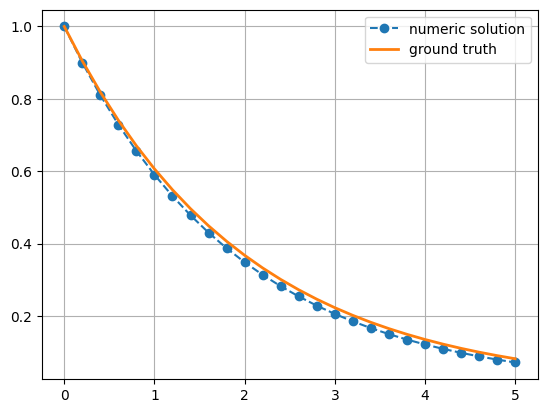

In [6]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Теперь попробуем задать значение шага $\tau$ (в коде это `dt`) такое, что $|\lambda| \tau > 1$.

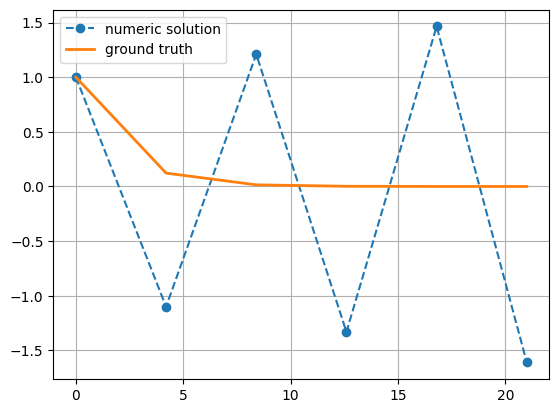

In [4]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=12/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

## Задание 1. Неявный метод Эйлера.

Решите то же самое уравнение $$d u / d t=\lambda u, $$
 используя невную схему Эйлера. Сравните поведение неявной и явной схем Эйлера.  Постройте решение для нескольких значений шага интегрирования, опишите поведение решения при $\lambda\tau > 2$. 


Для реализации неявной схемы необходимо на каждом шаге решать уравнение:
$$
\frac{y_{n+1} - y_{n}}{\tau} = f(t_{n+1}, y_{n+1}) = \lambda y_{n+1}
$$

$$
y_{n+1}(\frac{1}{\tau} - \lambda) = \frac{y_{n}}{\tau}
$$

$$
y_{n+1} = \frac{y_{n}}{1 - \tau \lambda}
$$


In [10]:
def implicit_euler_solve(lam, u0, T, dt) -> tuple:
    """Решает уравнение du/dt = lambda u на отрезке 0, T по неявной схеме эйлера

    Args:
        lam (float): коэффициент при U
        u0 (float): Начальное условие U(0) = U0
        T (float): Конечное время
        dt (float): Шаг

    Returns: 
        tuple(np.ndarray, np.ndarray): Время и решение
    """
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt * lam)
    return tt, y

<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_36734/2189976568.py:15: SyntaxWarning: invalid escape sequence '\l'
  ax[i, 0].set_ylabel(f'$\lambda = {lambda_vals[i]}$', fontsize = 16)


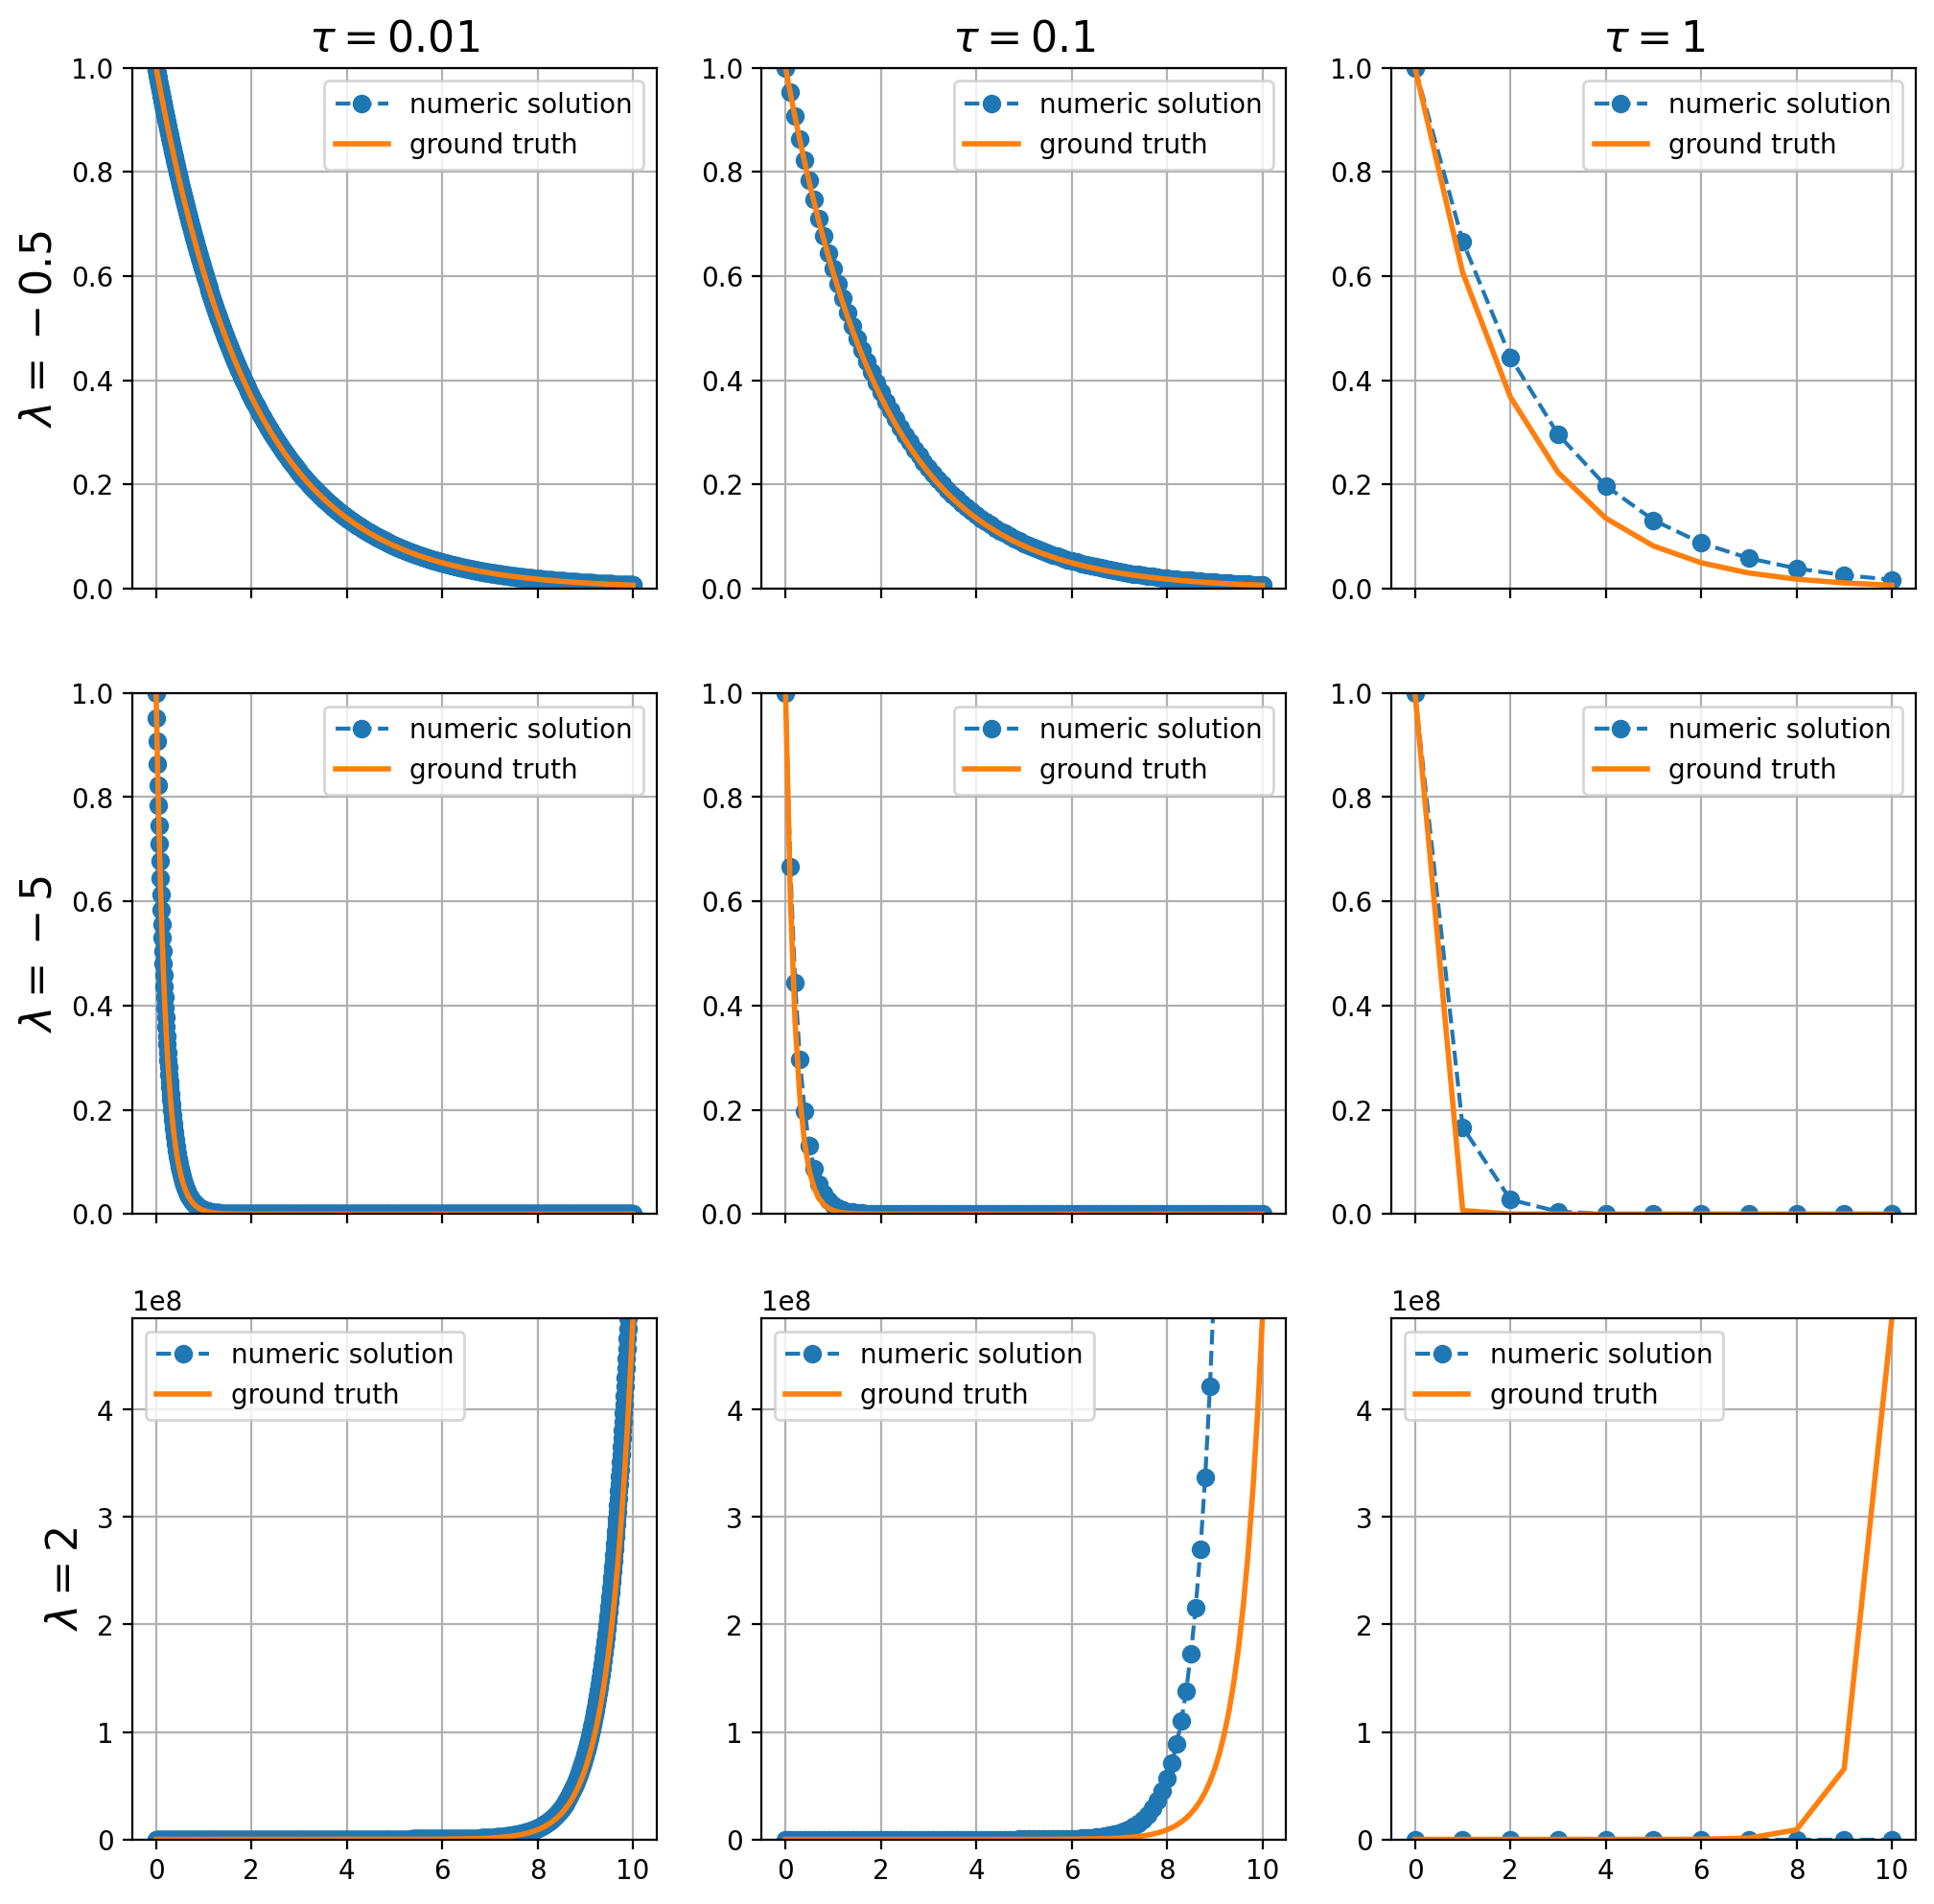

In [22]:
# Нарисовать графики с разными значениями шага, и отдельно при lambda*tau > 2.

lambda_vals = [-0.5, -5, 2]
tau_vals = [1e-2, 0.1, 1]
T, L = np.meshgrid(tau_vals, lambda_vals)
fig, ax = plt.subplots(3, 3, figsize = (12, 12), dpi = 200, sharex=True)
for lam, dt, plotable in zip(L.ravel(), T.ravel(), ax.ravel()):
    tt, y = implicit_euler_solve(lam, u0=1.0, T=10, dt=dt)
    plotable.plot(tt, y, 'o--', label='numeric solution')
    plotable.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
    plotable.legend(loc='best')
    plotable.grid(True)
    plotable.set_ylim(0, np.max(np.exp(lam*tt)))
for i in range(len(lambda_vals)):
    ax[i, 0].set_ylabel(f'$\lambda = {lambda_vals[i]}$', fontsize = 16)
    ax[0, i].set_title(r"$\tau" + f"= {tau_vals[i]}$", fontsize = 16)

In [23]:
# Для тестирования

lam = -0.5 
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()

## II. Системы линейных уравнений

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = \mathrm{const}$ - заданная матрица 2 $\times$ 2.


## Задание 2. Сравнение явной схемы Эйлера и матричной экспоненты.


Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((num_steps + 1, ndim))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*(y[k]@a)
    return tt,y

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_7900/2610815586.py:2: SyntaxWarning: invalid escape sequence '\i'
  """Solve the system du/dt = Au via an explicit Euler scheme.


Напишите функцию, возвращающую решение задачи Коши для системы уравнений $du/dt = A u$ с постоянной матрицей $A$ через матричную экспоненту. (Используйте библиотечную функцию `scipy.linalg.expm`)

In [6]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
    
    u0 : ndarray, shape (ndim,)
    
    tt : ndarray, shape (n,)
        The values of $t$
        
    Return
    ------
    u : ndarray, shape (n, ndim)
        u[:, k] is $\exp(t[k] A)$
    """
    return np.array([expm(a * t)@u0 for t in tt])

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_7900/1896775677.py:4: SyntaxWarning: invalid escape sequence '\e'
  """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.


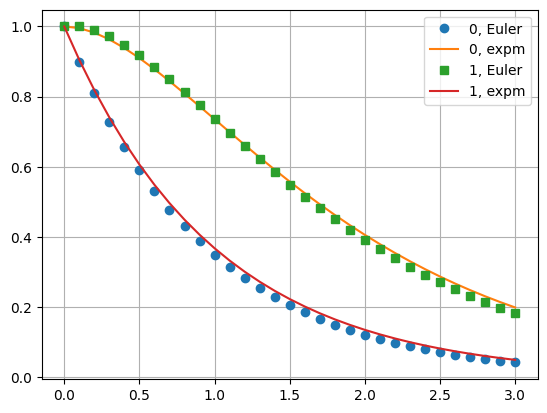

In [7]:
# Solve via Euler's method, compare to the matrix exponential

from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

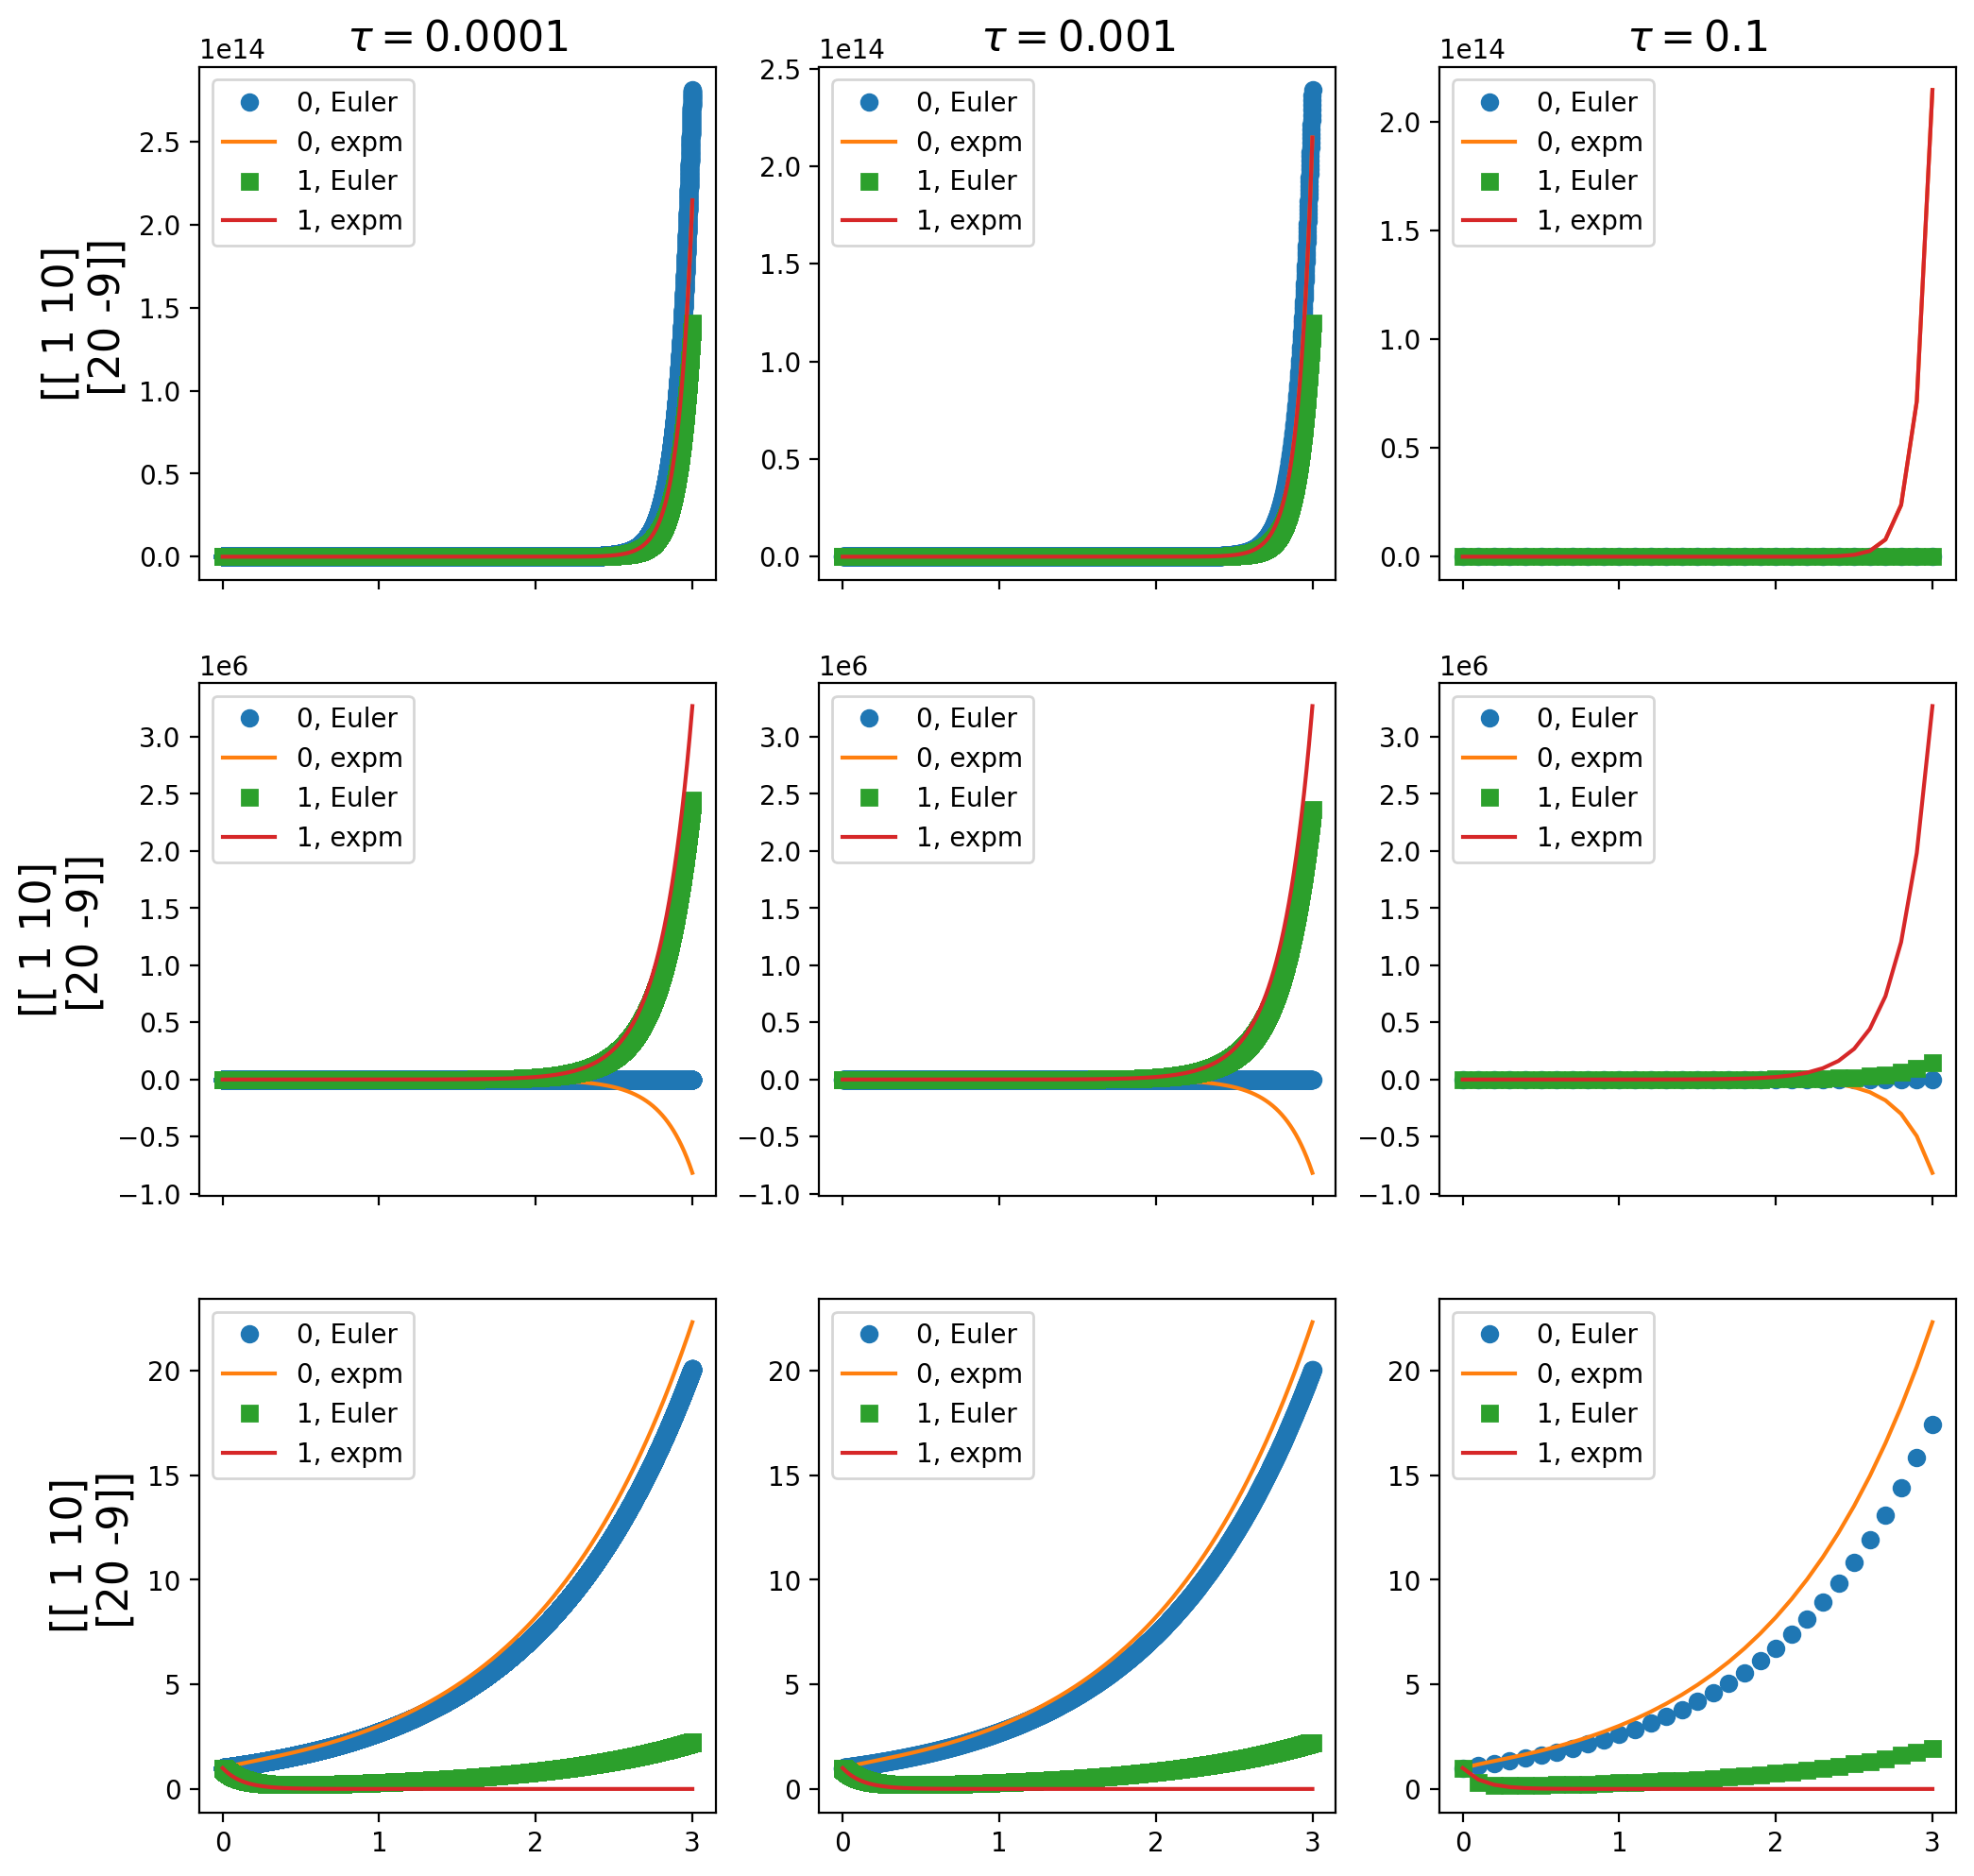

In [45]:
# Сравните здесь метод Эйлера с методом матричной экспоненты


a_vals = np.array([
    [[1, 10],
     [20, -9]],
    [[1, -1],
     [0, 5]],
    [[1, 1],
     [0, -8]],
])

tau_vals = [1e-4, 1e-3, 0.1]
T, A = np.meshgrid(tau_vals, a_vals)
A = np.repeat(a_vals, 3, axis = 0)

fig, ax = plt.subplots(3, 3, figsize = (12, 12), dpi = 200, sharex=True)
for tau, a, plotable in zip(T.ravel(), A, ax.ravel()):
    t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=tau)
    ym = mat_exp_solve(a, [1, 1], t)
    plotable.plot(t, y[:, 0], 'o', label='0, Euler')
    plotable.plot(t, ym[:, 0], '-', label='0, expm')

    plotable.plot(t, y[:, 1], 's', label='1, Euler')
    plotable.plot(t, ym[:, 1], '-', label='1, expm')
    plotable.legend()
for i in range(len(tau_vals)):
    ax[i, 0].set_ylabel(A[i], fontsize = 16)
    ax[0, i].set_title(r"$\tau" + f"= {tau_vals[i]}$", fontsize = 16)

## III. Жесткие системы

Рассмотрим линейную систему, $du/dt = Au$, с матрицей правой части 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $u = (1, 0)^T$.

Система называется жесткой, если для всех $(x, \vec{y}(x))$ (на решениях системы) собственные значения матрицы Якоби системы  $\mathbf{J}(x)$ (в данном случае она равна $A$)  удовлетворяют условиям

 $\max _j\left|\operatorname{Re} \lambda_j\right| / \min _k\left|\operatorname{Re} \lambda_k\right| \gg 1, \quad \operatorname{Re} \lambda_j<0$, $\max _j\left|\operatorname{Im} \lambda_j\right| \ll \max _k\left|\operatorname{Re} \lambda_k\right| \forall j, k$. 
 
 Число $s=\max _i\left|\operatorname{Re} \lambda_i\right| / \min _k\left|\operatorname{Re} \lambda_k\right|$ называется числом жесткости системы.

Пример.

Для решения задачи Коши системы ОДУ используется численный метод Рунге-Кутты, заданный таблицей Бутчера:
$$
\left.\begin{array}{c}
u^{\prime}=-800 u+4 \cdot 10^{-2} v+2 \cdot 10^{-2} w, u(0)=0, \\
v^{\prime}=-5 v-3 w, v(0)=4, \\
w^{\prime}=v-w, w(0)=6,
\end{array}\right\} \quad \quad \begin{array}{l|ll}
1 / 5 & 1 / 5 & 0 \\
4 / 5 & 3 / 5 & 1 / 5 \\
\hline & 1 / 2 & 1 / 2
\end{array}
$$
Получим для него функцию и условие устойчивости. Вычислим число жёсткости.

$$
R(z)=\frac{1+\frac{3}{5} z+\left(\frac{1}{2}-\frac{2}{5}+\frac{1}{25}\right) z^2}{1-\frac{2}{5} z+\frac{1}{25} z^2}
$$
Матрица $\mathbf{J}(x)$ (см. формулу (7.1.3)) постоянна и ее собственные значения $\lambda_1=-2, \lambda_2=-4, \lambda_3=-800$ лежат на действительной оси. Так как $z_i=\lambda_i h$, то и функцию устойчивости достаточно исследовать на действительной оси. 

Область устойчивости определяется из условия $|R(z)| \leq 1$. Получаем

 $\operatorname{Im} z_i=0, \operatorname{Re} z_i\left(1+\operatorname{Re} z_i / 10\right) \leq 0, i=1,2,3$.


Шаг интегрирования, который удовлетворяет всем условиям $h \in(0,10 / 800]$. 

Число жесткости $s=800 / 2=400$. 

## Задание 3.  Проверка жёсткости системы и неявные методы.

Найдите собственные значения матрицы $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

Решите систему, используя фиксированный шаг $$\tau=0.01 .$$ 

 Стабилен ли метод на шаге такого размера? 


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Постройте графики решения системы на интервале $0 < t < 1$ с начальным условием $u = (1, 0)^T$ используя функции `euler_solve2` и `mat_exp_solve`. Используйте несколько значений шага, например $\tau = 4\cdot 10^{-3}$ и $\tau = 4.5\cdot 10^{-3}$. Прокомментируйте поведение решений.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Реализуйте неявную схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линейных алгебраических уравнений (используйте np.linalg.solve ).

Сравните решения, полученные явной и неявной схемами Эйлера.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Задание 4. Исследование на A- и L-устойчивость.


Определить функцию устойчивости и область устойчивости метода Рунге-Кутты заданного таблицей Бутчера: 

\begin{array}{l|ll}
0 & 0 & 0 \\
2 & 3 / 2 & 1 / 2 \\
\hline & 3 / 4 & 1 / 4
\end{array}

Исследовать его на A- и L-устойчивость. 

## Задание 5. Исследование на жесткость и область устойчивости.

Для решения задачи Коши системы ОДУ используется численный метод Рунге-Кутты, заданный таблицей Бутчера:
$$
\left.\begin{array}{c}
u^{\prime}=-400 u, u(0)=1, \\
v^{\prime}=3 \cdot 10^{-2} u-10 v+w, v(0)=-1, \\
w^{\prime}=-4 \cdot 10^{-2} u-12 v-2 w, w(0)=0,
\end{array}\right\} \quad \begin{array}{l|ll}
1 / 8 & 1 / 8 & 0 \\
7 / 8 & 3 / 4 & 1 / 8 \\
\hline & 1 / 2 & 1 / 2
\end{array}
$$
Получите для него функцию и условие устойчивости. Вычислите число жёсткости.

# Задача Коши для ОДУ второго порядка.


Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$



## Задание 6. Законы сохранения и решение ОДУ.


Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.


Решите данную систему уравнений, используя явную  схему Эйлера на интервале времени не менее десяти периодов осцилляций. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{(du/dt)^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

Сделаем замену 
$$
v = \frac{du}{dt}
$$
Получили систему уравнений

$$
\frac{du}{dt} = v \\
\frac{dv}{dt} = -\omega^{2} u
$$

Перепишем это выражение в матричной форме. Пусть $\vec{h} = [u, v]^{T}$

$$
\frac{d \vec{h}}{d t} = \begin{pmatrix}
0 & 1 \\
-\omega^{2} & 0
\end{pmatrix} \vec{h}
$$


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((num_steps + 1, ndim))
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*(a@y[k])
    return tt,y


<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipykernel_17293/3748162025.py:2: SyntaxWarning: invalid escape sequence '\i'
  """Solve the system du/dt = Au via an explicit Euler scheme.


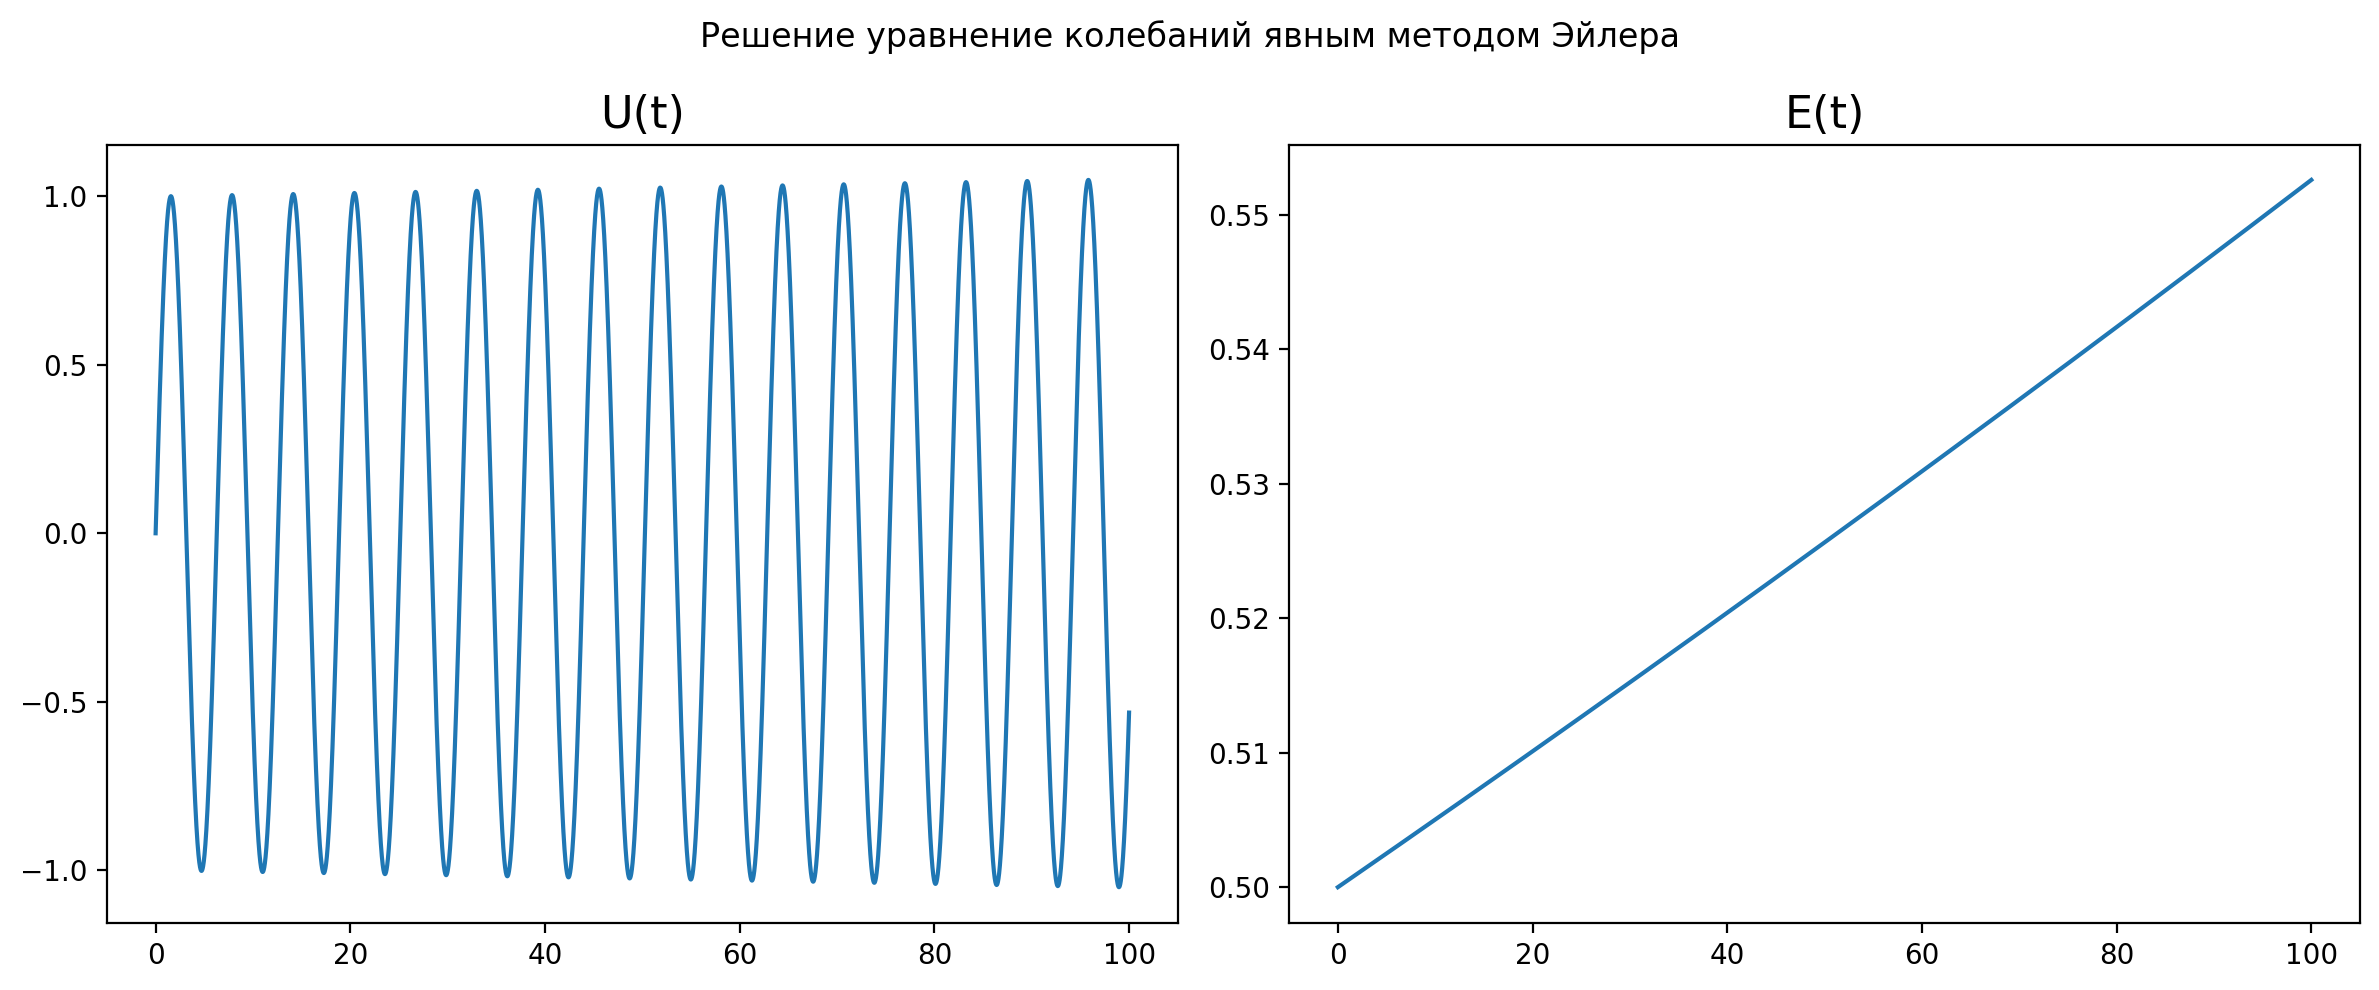

In [6]:
omega = 1
a = [[0, 1], [-np.power(omega, 2), 0]]
T = omega * 100
dt = 1e-3
u0 = [0, 1]
tt, h = euler_solve2(a, u0, T, dt)
E = np.power(h[:, 1], 2) / 2 + np.power(omega * h[:, 0], 2) / 2
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
ax[0].plot(tt, h[:, 0])
ax[1].plot(tt, E)
ax[1].set_title("E(t)", fontsize = 16)
ax[0].set_title("U(t)", fontsize = 16)
fig.suptitle("Решение уравнение колебаний явным методом Эйлера", fontsize = 12)
fig.tight_layout()

Реализуйте схему Рунге-Кутта второго порядка. Используте ее для решения того же уравнения с теми же значениями шага $\tau$. Сравните решения, полученные методом Рунге-Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

__Метод Эйлера с пересчётом:__

\begin{aligned}
&y_{n+1}=y_{n}+h \cdot \frac{f_{1}+f_{2}}{2} \\
&f_{1}=f\left(x_{1}, y_{n}\right) \\
&f_{2}=f\left(x_{n}+h, y_{n}+h f_{1}\right)
\end{aligned}  

\begin{array}{l|ll}
0 & 0 & 0 \\
1 & 1 & 0 \\
\hline & 1 / 2 & 1 / 2
\end{array}  


In [7]:
def runge_method(a: np.ndarray, u0: np.ndarray, T: float, dt: float) -> tuple:
    """Решение системы ОДУ явным методом Рунге-Кутта второго порядка(методом Эйлера с пересчетом)

    Args:
        a (np.ndarray): 2*2 матрица правой части уравнения
        u0 (np.ndarray): вектор начального условия
        T (float): решение ищется в пределах (0, T)
        dt (float): временной шаг

    Returns:
        tuple(np.ndarray, np.ndarray): время и зависимость решения от времени
    """
    steps_num = int(T / dt) + 1
    time = np.arange(steps_num) * dt
    y = np.zeros((steps_num, 2))
    y[0] = u0
    for i in range(1, steps_num):
        k1 = a @ y[i - 1]
        k2 = a @ (y[i - 1] + dt * k1)
        y[i] = y[i - 1] + dt * (k1 + k2) / 2
    return time, y

Энергия постоянна True


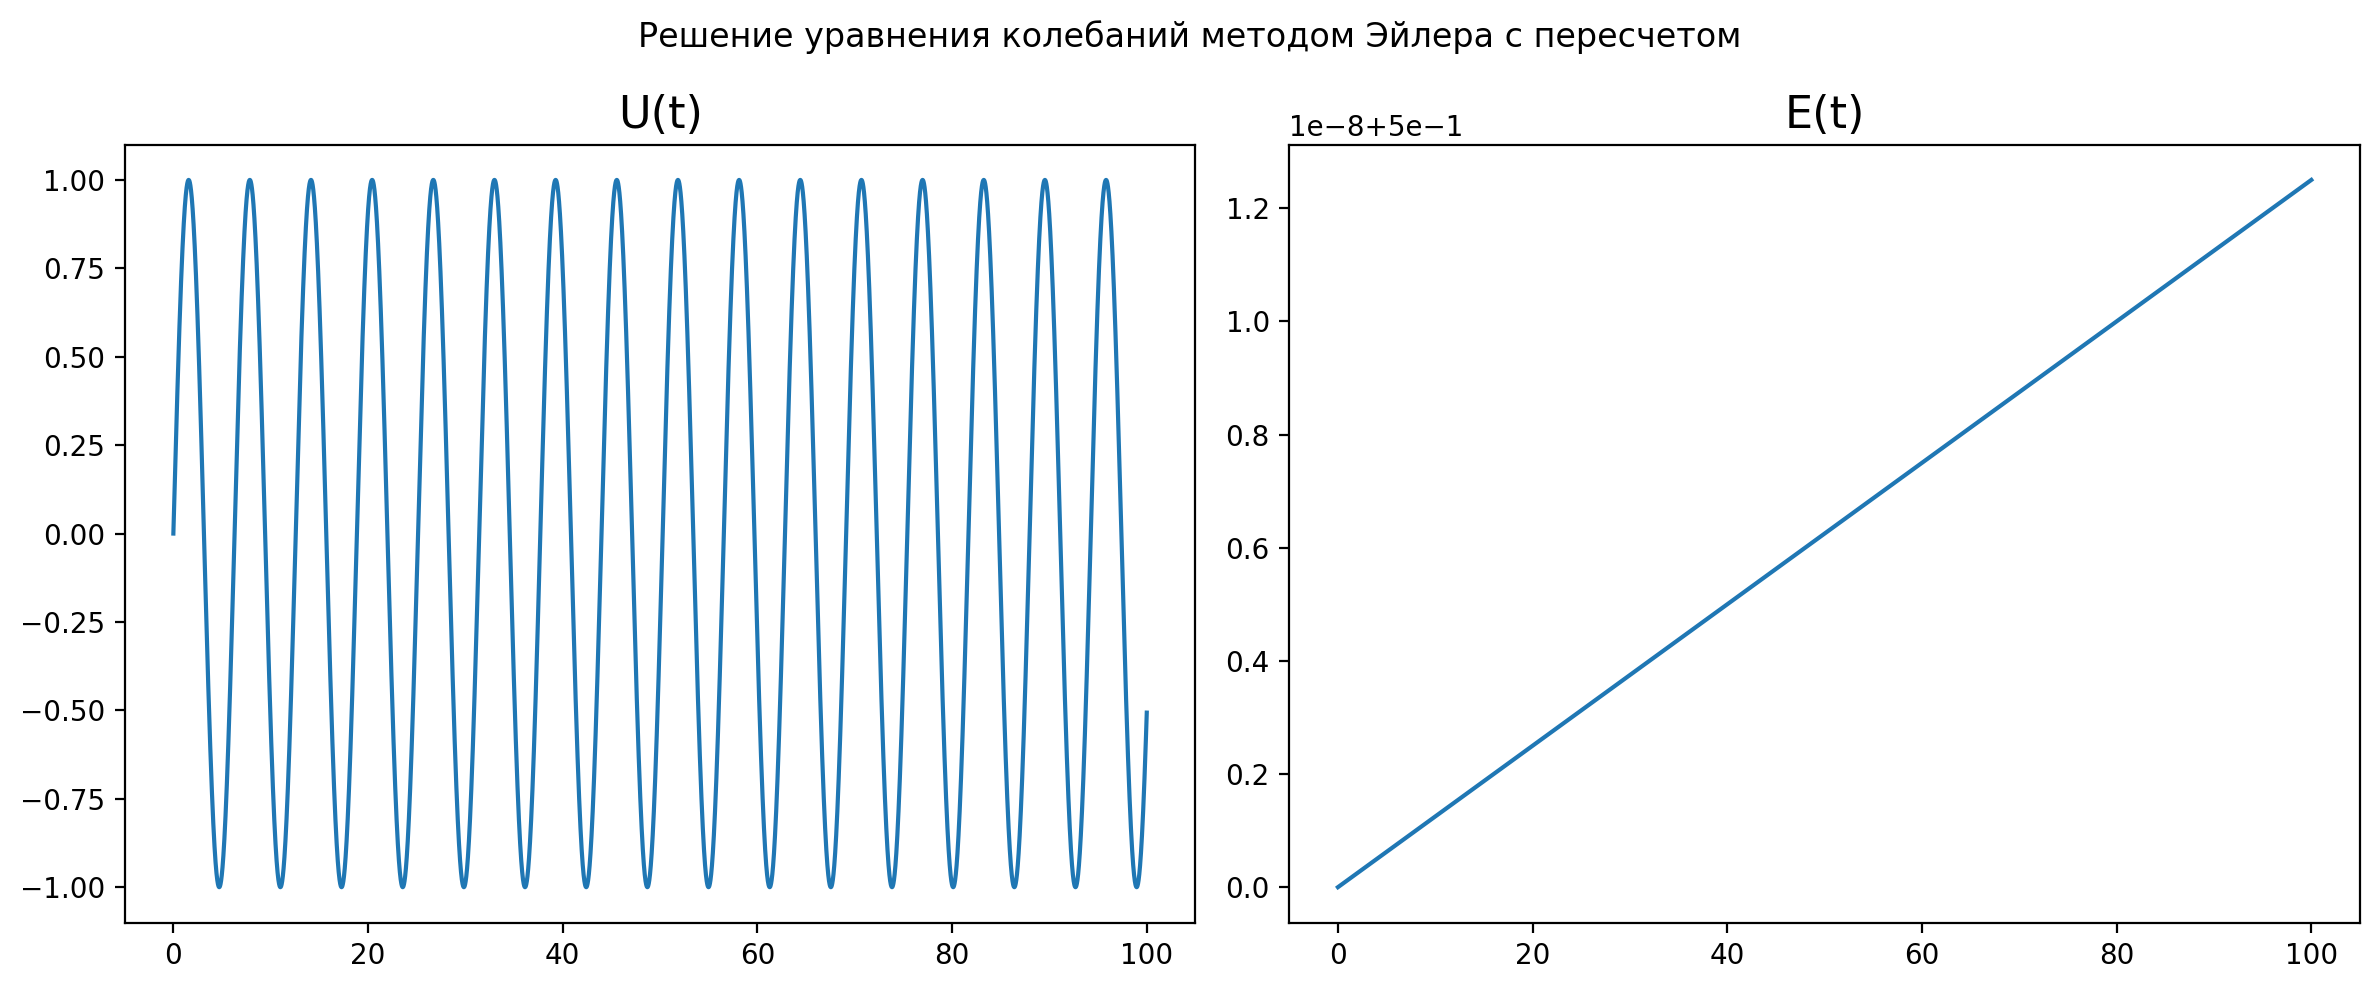

In [8]:
omega = 1
a = [[0, 1], [-np.power(omega, 2), 0]]
T = omega * 100
dt = 1e-3
u0 = [0, 1]
tt, h = runge_method(a, u0, T, dt)
E = np.power(h[:, 1], 2) / 2 + np.power(omega * h[:, 0], 2) / 2
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
ax[0].plot(tt, h[:, 0])
ax[1].plot(tt, E)
print(f"Энергия постоянна {np.allclose(E, np.ones_like(E) * 0.5)}")
ax[1].set_title("E(t)", fontsize = 16)
ax[0].set_title("U(t)", fontsize = 16)
fig.suptitle("Решение уравнения колебаний методом Эйлера с пересчетом", fontsize = 12)
fig.tight_layout()

Проверьте соблюдение закона сохранения энергии после выполнения большого количества шагов. Нарисуйте графики решений вместе с графиком точного решения. 



$$
u = C_{1} \operatorname{cos}(\omega t) + C_{2} \operatorname{sin}(\omega t)
$$

$$
U(0) = C_{1} = 0 \\
U'(0) = C_{2} \omega = 1 \to C_{2} = 1 / \omega 
$$

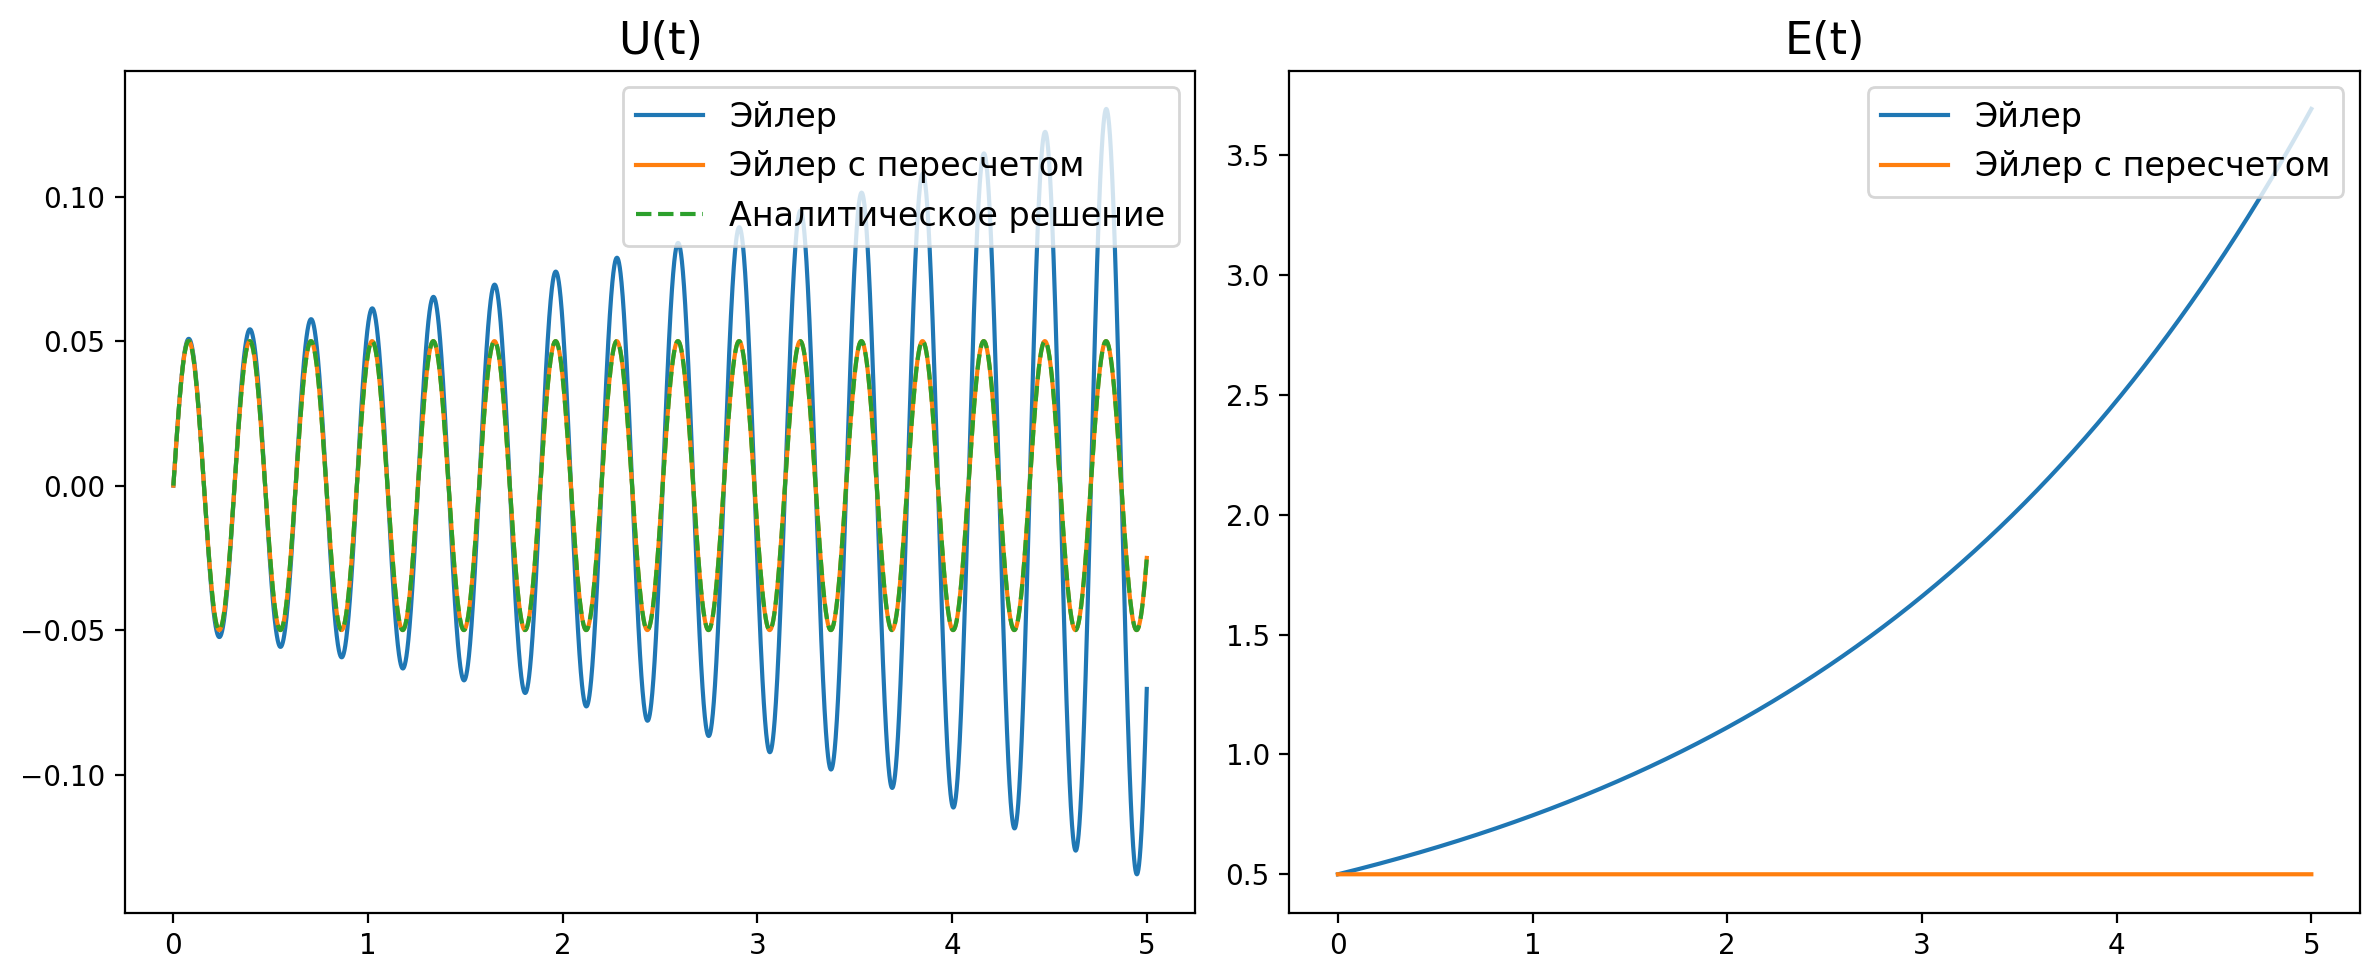

In [9]:
omega = 20
a = [[0, 1], [-np.power(omega, 2), 0]]
T = 100 / omega
dt = 1e-3
u0 = [0, 1]
tt, h = euler_solve2(a, u0, T, dt)
E = np.power(h[:, 1], 2) / 2 + np.power(omega * h[:, 0], 2) / 2
_, h_runge = runge_method(a, u0, T, dt)
E_runge = np.power(h_runge[:, 1], 2) / 2 + np.power(omega * h_runge[:, 0], 2) / 2
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
ax[0].plot(tt, h[:, 0], label = 'Эйлер')
ax[1].plot(tt, E, label = 'Эйлер')

ax[0].plot(tt, h_runge[:, 0], label = 'Эйлер c пересчетом')
ax[1].plot(tt, E_runge, label = 'Эйлер с пересчетом')

ax[0].plot(tt, np.sin(omega * tt) / omega, linestyle = '--', label = 'Аналитическое решение')

ax[1].set_title("E(t)", fontsize = 16)
ax[0].set_title("U(t)", fontsize = 16)
ax[0].legend(fontsize = 12, loc = 'upper right')
ax[1].legend(fontsize = 12, loc = 'upper right')
fig.tight_layout()

*Решите задачу используя предиктор и корректор. Предиктор - дифференциальное уравнение первого порядка, корректор - закон сохранения энергии. Убедитесь, что при большом количестве шагов закон сохранения энергии теперь сохраняется. Отличается ли полученное решение от точного решения после большого количества шагов?

## Задание 7*. Методы предиктора и корректора для ОДУ.

Используте для решения того же уравнения библиотечную функцию `scipy.intergrate_solve_ivp`.
Сравните результаты с решениями, полученными методами Рунге-Кутта и Эйлера. Проверьте закон сохранения энергии. Обсудите.

In [3]:
from scipy import integrate
import numpy as np 
import matplotlib.pyplot as plt

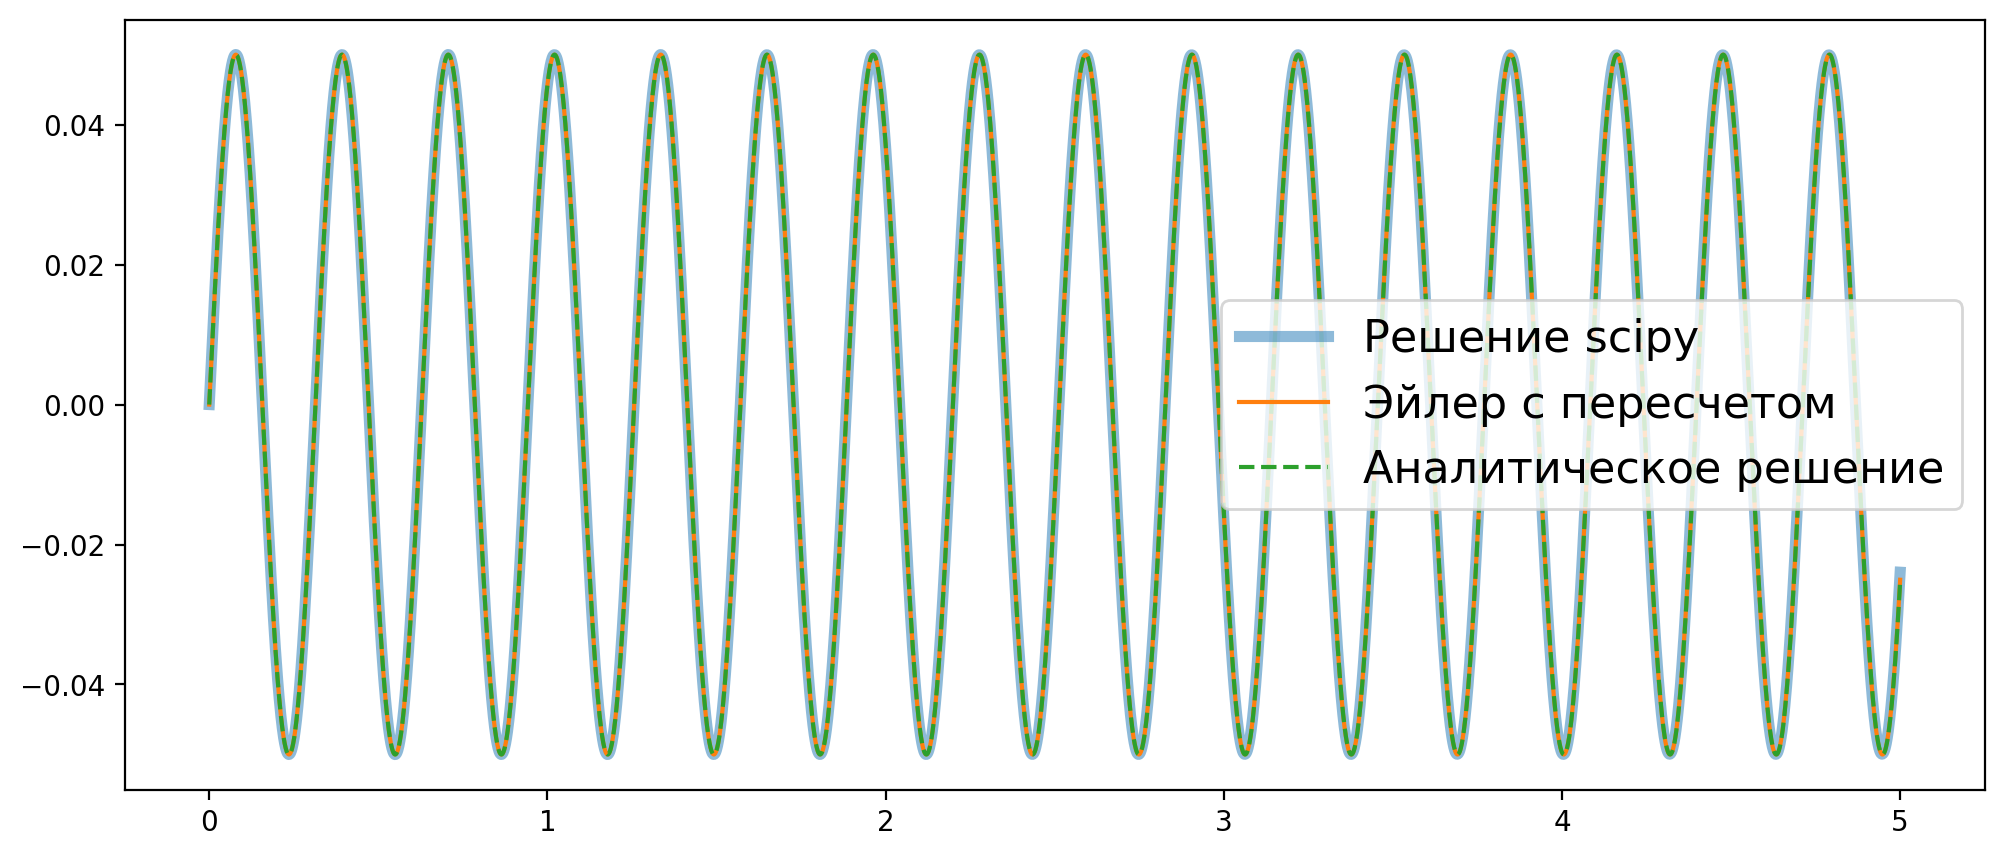

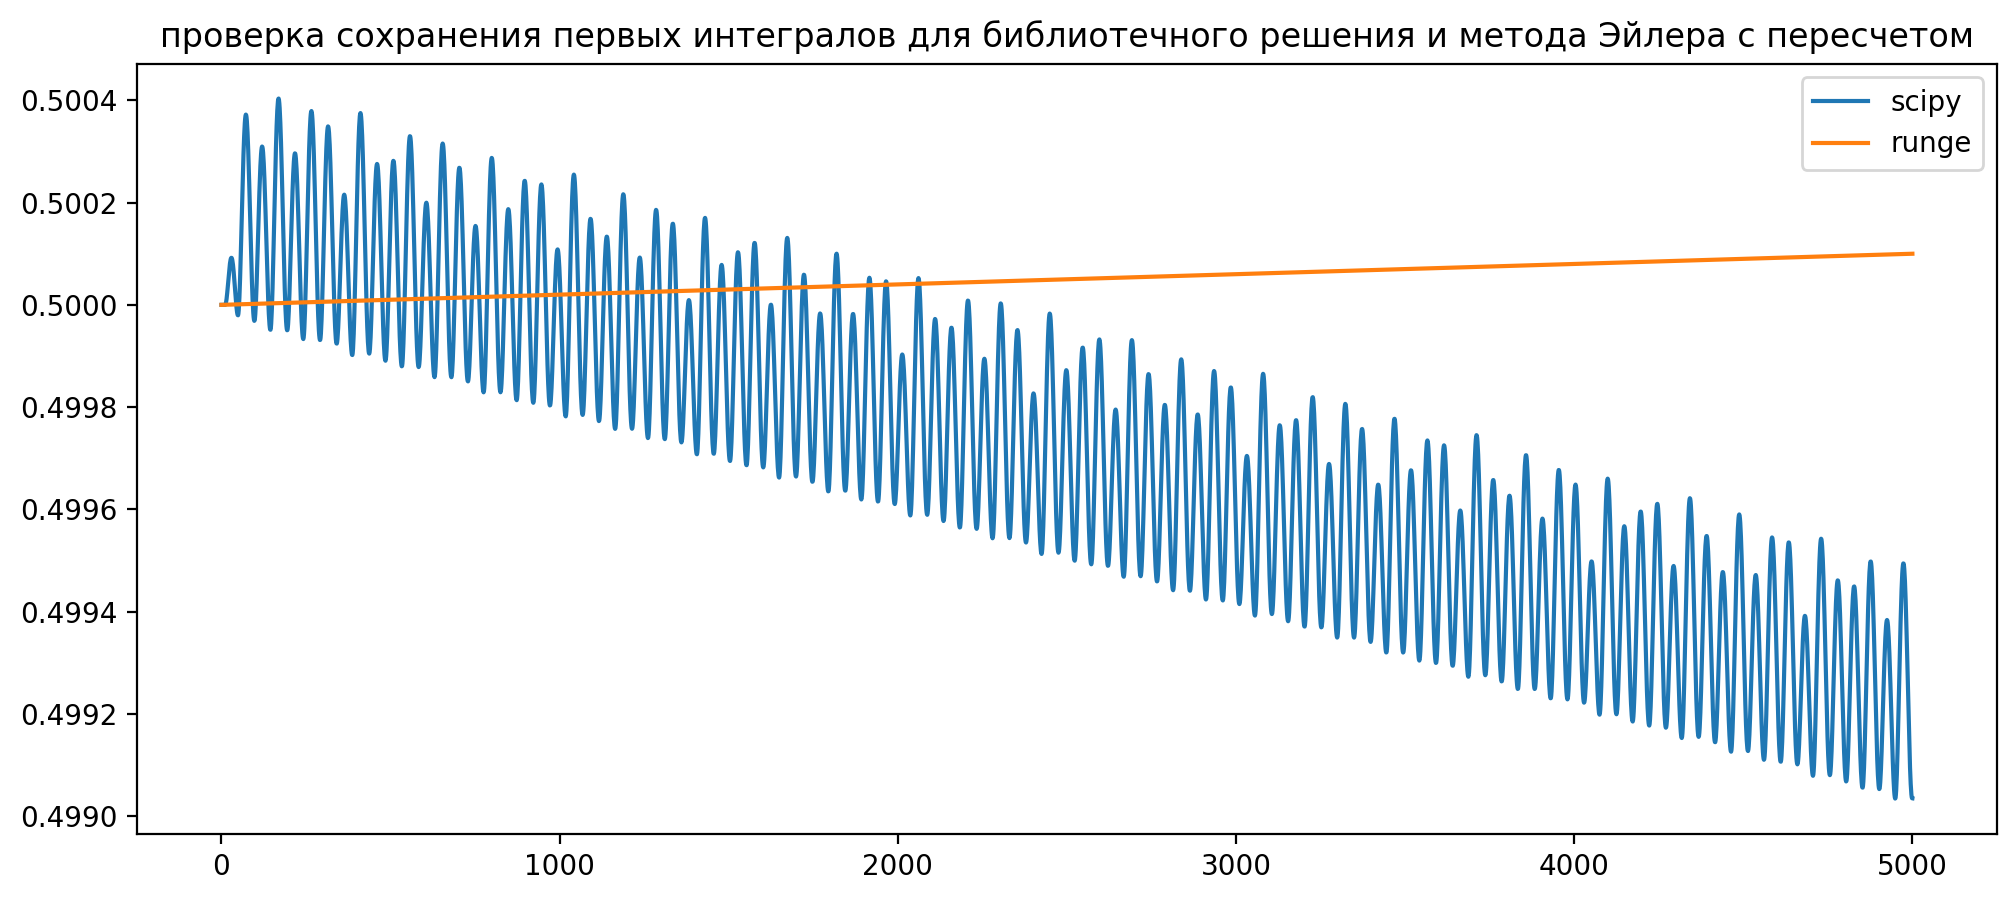

In [21]:
a = [[0, 1], [-np.power(omega, 2), 0]]
T = 100 / omega
dt = 1e-3
u0 = [0, 1]
system_func = lambda t, h: a @ h
t_eval = np.arange(int(T / dt) + 1) * dt
scipy_solution = integrate.solve_ivp(system_func, y0=u0, t_span = (0, T), t_eval = t_eval)
energy_scipy = np.power(scipy_solution.y[1, :], 2) / 2 + np.power(omega * scipy_solution.y[0, :], 2) / 2
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(scipy_solution.t, scipy_solution.y[0], label = 'Решение scipy', linewidth  = 4, alpha = 0.5)
plt.plot(tt, h_runge[:, 0], label = 'Эйлер c пересчетом')

plt.plot(tt, np.sin(omega * tt) / omega, linestyle = '--', label = 'Аналитическое решение')
plt.legend(fontsize = 16)

plt.figure(figsize = (12, 5), dpi = 200)
plt.title("проверка сохранения первых интегралов для библиотечного решения и метода Эйлера с пересчетом")
plt.plot(energy_scipy, label = 'scipy')
plt.plot(E_runge, label = 'runge')
plt.legend()

Используя библиотечные функции, реализуйте метод прогноза-коррекции Адамса и метод Милна.  Проверьте закон сохранения энергии для каждого из них.

In [ ]:
# ... ENTER YOUR CODE HERE ...

## Задание 8*. Нелинейное уравнение Пуассона.


Напишите программу, которая решает нелинейное уравнение Пуассона:


$$
\phi^{\prime \prime}(x)=e^{\phi(x)}-n(x), \quad \text { где } n(x)=1+e^{-3(x-5)^{2}}  
$$


в области $0<=x<=10$ с начальными условиями $\phi(0)=0 \quad  , \phi^{\prime }(0) = 0.$

Постройте аналитическое решение с помощью ряда Тейлора и сравните с численным. 

# Дополнительные задачи.


## Задание 9.  Движение планет вокруг Солнца.

### Постановка задачи.

Задача о движении тела в центральном поле тяготения является хорошим примером, демонстрирующим возможности использования ПК для изучения поведения объекта, подчиняющегося некоторым общим физическим законам. 
Процесс выведения спутника на орбиту обычно разбивается на два этапа. На первом этапе спутник поднимается над атмосферой практически вертикально на некоторую высоту. Затем обычно последняя ступень ракетоносителя придает спутнику необходимую горизонтальную скорость, и далее он двигается по инерции.

Рассмотрим инерционный полет небольшого тела (спутника) около притягивающего центра с большой массой (Земли). Будем интересоваться тем, какие траектории спутника возможны, какой должна быть его минимальная скорость вблизи поверхности Земли, чтобы он, двигаясь по круговой траектории, не упал на Землю (первая космическая скорость), какой должна быть минимальная начальная скорость спутника, чтобы получилась незамкнутая траектория и спутник ушел от Земли (вторая космическая скорость). В численном эксперименте можно также проверить законы Кеплера: 

1) притягивающий центр расположен в одном из фокусов орбиты; 

2) радиус-вектор от Солнца до планеты “заметает” равные площади за равные промежутки времени; 

3) квадраты периодов обращения спутников вокруг притягивающего центра относятся как кубы больших полуосей эллипсов их орбит.

В основу модели мы положим закон всемирного тяготения. Будем считать, что на тело, движение которого рассматривается, действует только сила тяготения и уравнение Ньютона имеет вид: 

$$m a=-\frac{G M m}{r^{3}} \mathbf{r}  $$

Здесь m и M — масса спутника и масса притягивающего центра, G — гравитационная постоянная, r — радиус-вектор, задающий положение спутника относительно притягивающего центра, a — ускорение спутника.
Хотя закон всемирного тяготения записан для материальных точек, он имеет такую же форму для сферически-симметричных тел.
Движение тела под влиянием центральной силы происходит в одной плоскости, положение которой определяется векторами r0 и v0, задающими начальное положение тела и его начальную скорость. Декартову систему координат с началом в центре тяготения и начало отсчета времени выберем так, чтобы движение происходило в плоскости Oxy и в начальный момент скорость тела была перпендикулярна оси x. 
 
 


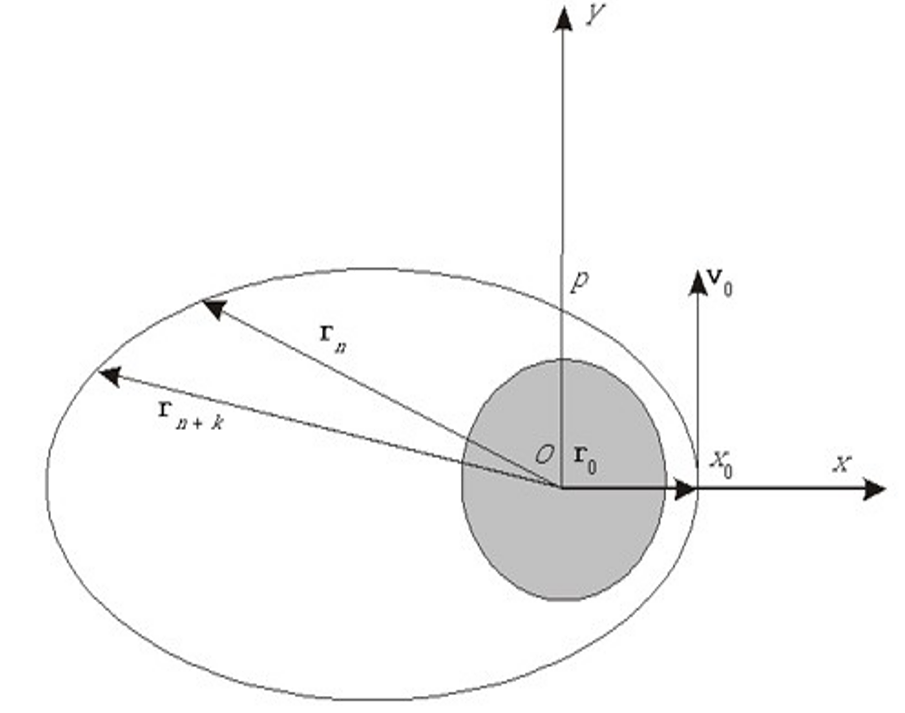  



Тогда начальные условия можно записать в виде:
$$
t=0: x=x_{0}, y=0, v_{x}=0, v_{x}=v_{0}
$$  

### Численная модель.

Численный анализ задачи удобно проводить, используя в качестве единиц измерения характерные масштабы задачи. В качестве единицы длины удобно взять $x_{0} .$ Если разговор идет о спутнике Земли, то эта величина имеет порядок радиуса Земли $R$ и равняется $R+h$, где $h$ - высота спутника над поверхностью Земли. Всякое расстояние теперь будет задаваться числом, которое показывает, сколько раз в нем укладывается $x_{0}$. Безразмерное $x$ будет равняться $x$, измеренному в метрах, деленному на $x_{0}$, также измеренному в метрах. Единицу времени удобно построить, используя гравитационную постоянную и характеристики притягивающего центра. Из уравнения легко видеть, что множитель $G M / r^{2}$ имеет размерность ускорения $\left(M / c^{2}\right) .$ Вместо расстояния $r$ возьмем $x_{0}$ и сформируем выражение с размерностью времени $(c):$  $\left(G M / x_{0}^{3}\right)^{-1 / 2}$ 

. Его и выберем в качестве единицы времени. В качестве единицы скорости тогда естественно взять $\left(GM / x_{0}\right)^{1 / 2} .$
Измеренные в этих единицах проекции ускорения определяются следующими уравнениями (здесь и далее для безразмерных физических величин использованы те же обозначения, какие использовались для соответствующих размерных величин):

$$
\partial_{x}=-\frac{x}{\left(x^{2}+y^{2}\right)^{3 / 2}}, \partial_{y}=-\frac{y}{\left(x^{2}+y^{2}\right)^{3 / 2}}\\
$$

$$
\begin{gathered}
t=0: x=1, y=0, v_{x}=0, v_{y} = V_{0}, \\
\operatorname{где} V_{0}=V_{0} \cdot\left(x_{0} / GM\right)^{1 / 2} .
\end{gathered}
$$

Все физические величины измеряются теперь в относительных единицах и будут одинаковыми для всех систем “спутник — притягивающий центр”. Уменьшилось также число параметров задачи. 

Единственный безразмерный параметр Vo, который остался в задаче, показывает, как соотносятся между собой кинетическая и потенциальная энергии спутника в начальный момент. Действительно, кинетическая энергия спутника в начальный момент равна 

$\mathrm{K}=m v_{0}^{2} / 2$, потенциальная энергия для закона тяготения равна П $=G M m / x_{0}$, и $\mathrm{V}_{0}^{2}=2 \mathrm{~K} /$ П.


Для нахождения в различные моменты времени проекций скорости спутника и его координат на временной оси выберем дискретные точки $t_{n,}$ отстоящие друг от друга на малые интервалы $\Delta t$. 

Тогда проекции скорости $\mathrm{v}_{x}^{(n+1)}$ и $v_{x}{ }^{(n+1)}$ в момент времени $t_{n}+1$ будут приближенно (считаем, что ускорение на этом интервале времени не изменилось) представляться выражениями

$$
\begin{aligned}
&v_{x}^{(n+1)}=v_{x}^{(n)}+\Delta t \cdot a_{x}^{(n)}, \\
&v_{y}^{(n+1)}=v_{y}^{(n)}+\Delta t \cdot a_{y}^{(n)} .
\end{aligned}
$$

а координаты в этот момент будем вычислять, как при равномерном движении (опять считая, что интервал времени Δt мал, и скорость в течение него такая, как в конце интервала):  

$$
\begin{aligned}
&x^{(n+1)}=x^{(n)}+\Delta t \cdot v_{x}^{(n+1)} \\
&y^{(n+1)}=y^{(n)}+\Delta t \cdot v_{y}^{(n+1}
\end{aligned}
$$
В начальный момент времени проекции скорости и координаты спутника известны:

$$
\begin{aligned}
&t_{0}=0: x^{(0)}=1, y^{(0)}=0, \\
&v_{x}^{(i)}=0, v_{y}^{(0)}=V_{0} .
\end{aligned}
$$

Система позволяет шаг за шагом, при малом $\Delta t$, достаточно точно вычислить траекторию спутника и все ее характеристики.  

Для классификации траекторий удобно вычислять их эксцентриситет е. В выбранной системе координат для вычисления эксцентриситета необходимо определить координату $y=p$ точки на траектории, для которой горизонтальная координата совпадает с фокусом эллипса. Тогда е $=|p-1|$. Если $e \leq 1$, то траекторией является замкнутая кривая (окружность при $e=0$ и эллипс при е 0), при $e=1$ (в численном эксперименте это значение точно получено быть не может) траекторией является парабола, а при e > 1 траектория есть гипербола.
Площадь, “заметаемую” радиус-вектором за некоторое время $T_{k}=t^{(n+k)}-t^{(i)}=k \cdot \Delta t$, можно вычислить следующим образом:
$$
S=\frac{1}{2} \sum_{l=n}^{n+k}\left(x^{(1)} \cdot v_{y}^{(l)}-y^{(0)} \cdot v_{x}^{\prime \prime}\right) \Delta t
$$
Интересно сравнить эти площади, вычисленные на разных участках траектории. По второму закону Кеплера они должны быть равны.




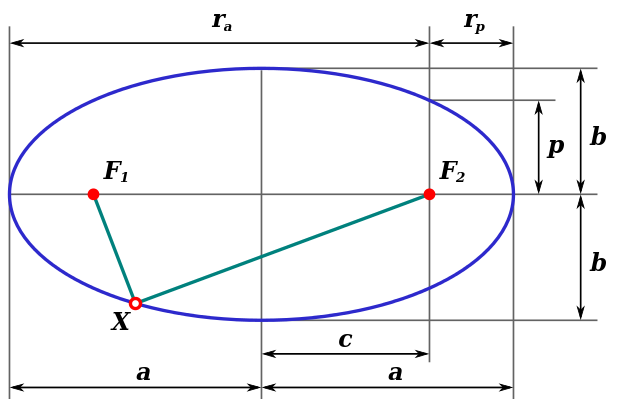  



По третьему закону Кеплера квадраты периодов обращения относятся как кубы больших полуосей орбит, т.е. для каждой траектории величина $\mathrm{K} 3=T^{2} / a^{3}$ должна оставаться постоянной. Для нахождения длины большой полуоси эллипса необходимо найти отрицательную координату $x_{\text {мин }}$ при $y=0 .$ Момент времени $t_{M}$, когда это произойдет первый раз, соответствует половине периода обращения спутника. Таким образом, величина большой полуоси равна: $a=(1+$ $\left.\left|x_{\text {диин }}\right|\right) / 2$, а период $T=2 t_{M} .$  

## Задание 10. Молекулярная динамика.

Промоделируйте с помощью формул, описанных ниже, движение 100 частиц, кинетическую энергию их задать по распределению Максвелла, а направлений начальных импульсов - равновероятным образом. Для этого можно сгенерировать 300 чисел с одинаковым нормальным распределением - это будут квадраты проекций скоростей. Затем направление вдоль или против осей - определять с вероятностью 1/2. 

Опишите, как изменяется характер движения с изменением температуры.

Взаимодействия между частицами (например, атомами или молекулами) будут считаться с помощью классической физики:

$$
m \cdot \ddot{\vec{r}}_{k}=\sum_{i=1}^{N} \varphi\left(\left|\vec{r}_{i}-\vec{r}_{k}\right|\right) \cdot\left(\vec{r}_{i}-\vec{r}_{k}\right) ; \varphi\left(\left|\vec{r}_{i}-\vec{r}_{k}\right|\right)=\frac{f(r)}{r}
$$

Вот эта формула - на деле полный аналог обычного $\mathrm{F}=\mathrm{ma}$.
(реальная «запутанная» формула длиннее, и выглядит менее эстетично, диссипативную составляющая здесь намеренно опущена).

Математически, моделирование методом частиц, представляет из себя решение задачи Коши для уравнений выше. Вычисление, всего этого дела, лучше всего поручить алгоритму Верле.

Алгоритм Верле используется для вычисления следующего местоположения точки по текущему и прошлому, без использования скорости. Формула получается следующим образом. Записывается разложение в ряд Тейлора для следующего и текущего положения:

$$
\begin{aligned}
&\vec{x}(t+\Delta t)=\vec{x}(t)+\vec{v}(t) \Delta t+\frac{\vec{a}(t) \Delta t^{2}}{2}+\frac{\vec{b}(t) \Delta t^{3}}{6}+O\left(\Delta t^{4}\right), \\
&\vec{x}(t-\Delta t)=\vec{x}(t)-\vec{v}(t) \Delta t+\frac{\vec{a}(t) \Delta t^{2}}{2}-\frac{\vec{b}(t) \Delta t^{3}}{6}+O\left(\Delta t^{4}\right),
\end{aligned}
$$

Сложив эти 2 уравнения, получим:

$$
\vec{x}(t+\Delta t)=2 \vec{x}(t)-\vec{x}(t-\Delta t)+\vec{a}(t) \Delta t^{2}+O\left(\Delta t^{4}\right)
$$

Алгоритм оптимален по точности и скорости, но ему надо знать два предыдущих положения частицы. Первый шаг оставим методу Эйлера.

Для моделирования идеального газа самым популярным является потенциал Леннарда-Джонса:   

$$
V(r)=D \cdot\left[\left(\frac{r_{\min }}{r}\right)^{12}-2 \cdot\left(\frac{r_{\min }}{r}\right)^{6}\right], f(r)=\frac{12 \cdot D}{a} \cdot\left[\left(\frac{r_{\min }}{r}\right)^{13}-\left(\frac{r_{\min }}{r}\right)^{7}\right]
$$
$r_{\min }$ межатомное расстояние (минимум потенциальной энергии),
f - сила взаимодействия,
r - расстояние между частицами.
После обезразмерирования потенциал выглядит так:  



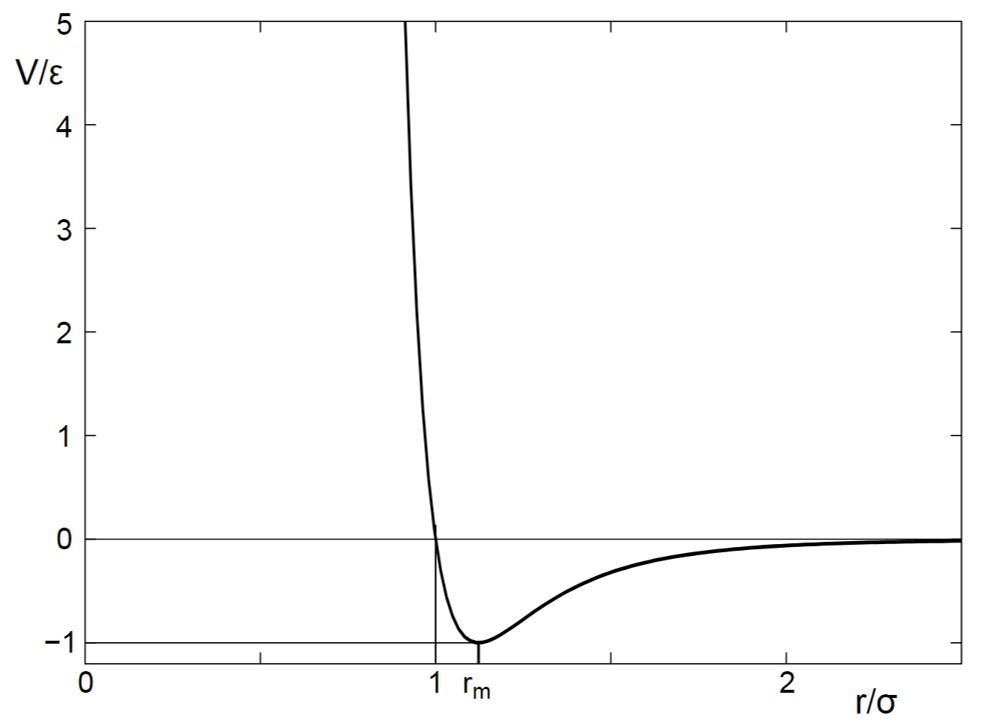  



Для ускорения расчётов потенциал Леннард-Джонса часто обрывают:


$$
V(r)=\left\{\begin{array}{c}
D \cdot\left[\left(\frac{r_{\min }}{r}\right)^{12}-2 \cdot\left(\frac{r_{\min }}{r}\right)^{6}\right]-V\left(r_{c}\right), \text { при } r \leq r_{c} ; r_{c}=\frac{2.5 \cdot r_{\min }}{\sqrt[6]{2}} \\
0,
\end{array}\right.
$$


Ещё одним из способов ускорения вычислений является
использование сплайнов (плавно соединяемых между собой многочленов). При этом потенциал взаимодействия разбивается на несколько участков, на каждом из которых он приближается простой функцией. Часто используется следующее приближение: 

\begin{aligned}
&V(r)=\left\{\begin{array}{c}
D \cdot\left[\left(\frac{r_{\min }}{r}\right)^{12}-2 \cdot\left(\frac{r_{\min }}{r}\right)^{6}\right], \text { при } r \leq r_{s} \\
k_{1} \cdot\left(r-r_{c}\right)^{3}+k_{2} \cdot\left(r-r_{c}\right)^{2}, \text { при } r_{s}<r \leq r_{c} \\
0, \\
\text { при } r>r_{c}
\end{array}\right. \\
&\text { Где: } r_{s}=r_{\min }\left(\frac{13}{7}\right)^{1 / 6} ; r_{c}=\frac{67 \cdot r_{s}}{48} ; k_{1}=-\frac{96768}{61009} \cdot \frac{D}{r_{s}^{3}} ; k_{1}=-\frac{6048}{3211} \cdot \frac{D}{r_{s}^{2}}
\end{aligned}   



In [9]:
import scipy.constants as const
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [10]:
def lennard_power(r, r_min: float, eps: float):
    return eps * (np.power(r_min/r, 13) - np.power(r_min/r, 7))
def check_boundaries(x, y):
    return (x > 0) * (x < 1) * (y > 0) * (y < 1)

In [32]:
def count_powers(crr):
    """_summary_

    Args:
        crr (N, 2): _description_
    """
    x, y = crr[:, 0], crr[:, 1]
    delta_x = x[:, np.newaxis] - x[np.newaxis, :]
    delta_y = y[:, np.newaxis] - y[np.newaxis, :]
    radiuses_abs = np.sqrt(np.power(delta_x, 2) + np.power(delta_y, 2))
    forces_abs = lennard_power(radiuses_abs, 1e-6, 100 * const.k)
    forces_abs[np.isnan(forces_abs)] = 0
    angles = np.arctan(delta_y / delta_x)
    angles[np.isnan(angles)] = 0
    forces_x = np.sum(np.cos(angles) * forces_abs, axis = 1)
    forces_y = np.sum(np.sin(angles) * forces_abs, axis = 1)
    forces = np.zeros_like(crr)
    forces[:, 0] = forces_x
    forces[:, 1] = forces_y
    return forces
    
def solve(crr_start, v_start, time_end, dt):
    crr_plus_dt = crr_start + v_start * dt
    iterations_num = int(time_end / dt) + 1
    time = np.arange(iterations_num) * dt
    coordinates = np.zeros((iterations_num, *crr_start.shape))
    coordinates[0] = crr_start
    coordinates[1] = crr_plus_dt
    for i in range(2, iterations_num):
        coordinates[i] = 2 * coordinates[i-1] - coordinates[i-2] + count_powers(coordinates[i-1, :]) / m
        velositys = (coordinates[i] - coordinates[i - 1])
        x, y = coordinates[i, :, 0], coordinates[i, :, 1]
        coordinates[i, x < 0, 0] = 0 + 2 * np.abs(velositys[x < 0, 0])  
        coordinates[i, x > 1, 0] = 1 - 2 * np.abs(velositys[x > 1, 0])  
        coordinates[i, y < 0, 1] = 0 + 2 * np.abs(velositys[y < 0, 1])  
        coordinates[i, y > 1, 1] = 1 - 2 * np.abs(velositys[y > 1, 1])  
    return coordinates

In [33]:
N = int(1e2) #число частиц
coordinates_start = np.random.random(size = (N, 2)) #начальные положения частиц задаём при помощи равномерного распределения
m = 2 * 1e-24
T = 300
time_end = 10
dt = 1e-2
iterations_num = int(time_end / dt) + 1
sigma = np.sqrt(m / (const.k * T))
v_start = sts.norm(loc = 0, scale = sigma).rvs(size = (N, 2))
crr = solve(coordinates_start, v_start, time_end=time_end, dt = dt)

/tmp/ipykernel_109072/2662978255.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps * (np.power(r_min/r, 13) - np.power(r_min/r, 7))
/tmp/ipykernel_109072/2662978255.py:2: RuntimeWarning: invalid value encountered in subtract
  return eps * (np.power(r_min/r, 13) - np.power(r_min/r, 7))
/tmp/ipykernel_109072/3400622079.py:13: RuntimeWarning: invalid value encountered in divide
  angles = np.arctan(delta_y / delta_x)


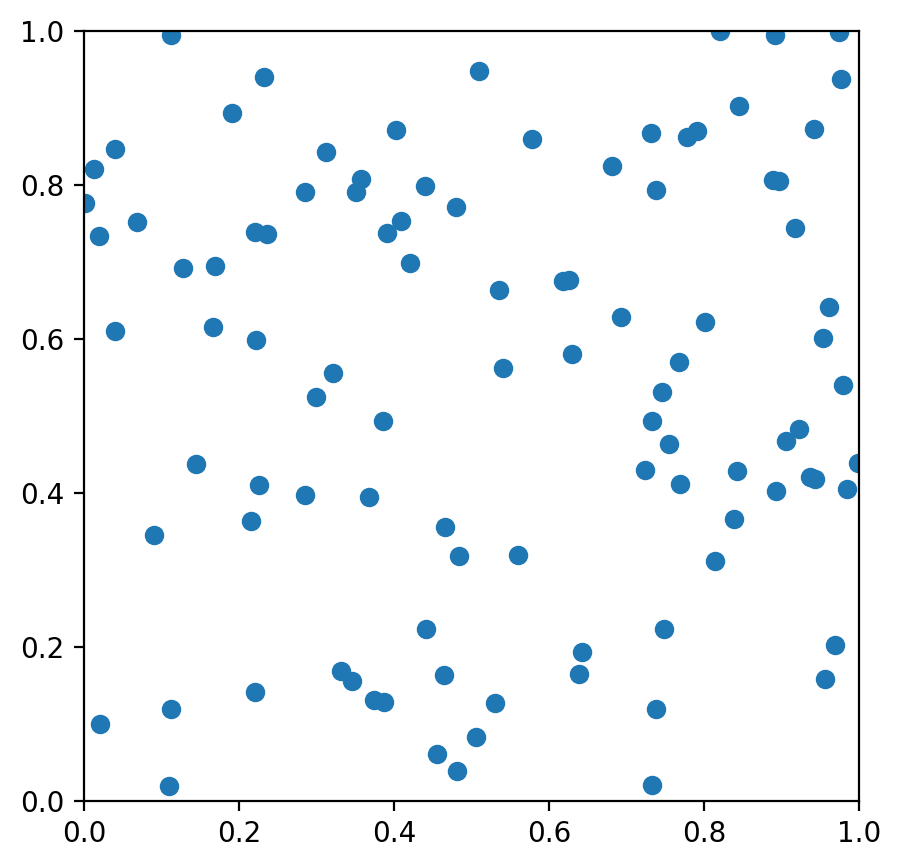

In [34]:
fig = plt.figure(figsize=(5, 5), dpi = 200)
ax = fig.add_subplot(111)
ax.axis([0,1,0,1])


def animate(i):
    ax.clear()
    ax.scatter(crr[i, :, 0], crr[i, :, 1])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

ani = animation.FuncAnimation(fig, animate, frames=len(crr))


ani.save('3.gif',  
          writer = 'ffmpeg', fps = 60) 

## Задание 11. Закон естественного радиоактивного распада.

Промоделируйте радиоактивный распад группы атомов. Постройте графики количества оставшихся атомов с течением для случаев $N_0$ = 10, 100, 1000, 1000000. Постройте их также в логарифмическом масштабе по N.

Эксперименты с тяжелыми атомами говорят, что их ядра распадаются, выбрасывая частицы и превращаясь в более легкие. Распад ядра происходит спонтанно и практически не зависит от внешних условий, в которых оно находится. Число распадов, регистрируемых в единицу времени, не зависит от внешних полей, концентрации радиоактивных атомов, химической структуры молекул, в которые входят радиоактивные атомы, а зависит только от числа атомов, ядра которых способны распадаться. Вероятность естественного распада ядра определяется его устройством и не зависит от того, что происходит вне ядра. Эта вероятность может быть описана некоторым числом, характерным для данных ядер. Таково главное свойство естественного радиоактивного распада. 

Вопросы для численного эксперимента на математической модели можно поставить следующим образом:

1. Как меняется со временем число нераспавшихся ядер, если в начальный момент их было $N_{0}$ ?
2. Каково среднее время жизни $T_{1}$ ядра?
3. Через какое время $T_{2}$ распадется половина ядер?
Ответы на первый и последний вопросы достаточно легко проверить в натурном эксперименте с быстро распадающимися ядрами.


Приступим к построению математической модели. В принятой концепции явления можно сказать, что на малом интервале времени $\Delta t$ число распавшихся ядер $-\Delta N=N(t)-N(t+\Delta t)$ пропорционально $N^{*} \Delta t .$
Кроме того, это число пропорционально числу нераспавшихся ядер в данный момент времени, поскольку каждое ядро независимо от других может испытать распад на рассматриваемом интервале времени Dt. 

Учитывая сказанное, для достаточно малого интервала времени можно написать следующее уравнение радиоактивного распада  

$\Delta N=\frac{N}{\tau} \cdot \Delta t$

Коэффициент пропорциональности записан в таком виде, чтобы константа вещества t имела размерность времени. Она определяет, насколько быстро распадаются ядра данного вещества. В теории радиоактивного распада обычно используют другую постоянную $\lambda=1 / \tau$, называемую радиоактивной постоянной.

Нам кажется использование $\tau$ более удобным, тем более что оно, как покажет эксперимент, имеет простой физический смысл. Если $\tau-$ велико, то за время $\Delta t$ распадется мало ядер, и наоборот, если $\tau$ - мало, то ядра распадаются быстро. Во втором случае требуется выбирать достаточно маленькое $\Delta t$, чтобы $\Delta N$ было малым и уравнение справедливым. Величина $\tau$ должна быть измерена в натурном эксперименте по подсчету числа распадов в заданном образце на небольшом интервале времени и вычислена по формуле.  

Опыт дает очень разные значения этой константы для разных веществ. Так, для радона $\tau=5,56$ дня, для радия - 2640 лет, для урана - 7,5\bullet10 $^{9}$ лет. Для полного определения функции $N(t)$ нужно задать число ядер вещества в начальный момент:

$$
t=0: N=N_{0}
$$

Уравнения определяют математическую модель радиоактивного распада. Теперь в модели нужно перейти к относительным единицам, чтобы уменьшить число параметров задачи и представить результаты численного эксперимента в относительных единицах.
В качестве характерного времени процесса можно взять $\tau$ - оно будет служить новой единицей времени: размерное время $t$, измеряемое в секундах, представим в виде $\mathrm{t}=\tau \cdot \tilde{t}, \tilde{t}-6$ езразмерное время.

В качестве характерного числа атомов возьмем их количество в момент $t=0$, т.е. представим число атомов в произвольный момент времени в виде $N=N_{0}$* $\widetilde{N} .$ Число $\widetilde{N}$ показывает долю оставшихся ядер от их числа в начальный момент. Подставим размерные величины:

$$
\Delta \widetilde{N}=-\widetilde{N} \cdot \Delta t, \tilde{t}=0: \tilde{N}=1
$$

Все входящие в уравнение величины безразмерные, поэтому в дальнейшем знак безразмерной величины “ " писать не будем.

Перейдем к описанию алгоритма вычисления числа ядер, не распавшихся к моменту времени $t$. Вдоль оси времени будем продвигаться малыми, но конечными шагами величиной $\Delta t$, обозначая соответствующие моменты времени $t_{n}=n \Delta t$ и число ядер $N_{n} .$ Связь между этими числами задается уравнением:

$$
\Delta N=N_{n+1}-N_{n}=-N_{n} \cdot \Delta t
$$

Запись в правой части числа ядер на левом конце временного интервала $\Delta t$ может привести к заметной ошибке, если на этом интервале происходит заметное изменение числа ядер.

$$
N_{0}=1, N_{n}+1=N_{n}-N_{n} \cdot \Delta t, n=1,2, \ldots
$$

Система разностных уравнений определяет число нераспавшихся ядер в последовательные моменты времени. Обратим внимание на то, что она не содержит характеристик вещества: полученные при численном эксперименте свойства распада будут универсальными.
Индивидуальность ядер проявится только через масштаб времени t.

Вернемся к вопросам, поставленным перед численным экспериментом. Для определения зависимости $N(t)$ по вычисленным значениям $N_{a}$ нужно построить плавную кривую процесса. Чтобы вычислить среднее время жизни ядра $T_{1}$, нужно просуммировать время жизни каждого из ядер и разделить его на полное число распавшихся ядер. Время жизни $t_{n}$ имеют те ядра, которые распались на интервале $t_{n+1}-t_{n} .$ Их число есть $N_{n}-N_{n+1}  .$ Отсюда получим

$$
T_{1}=\left(\sum_{n=0}^{\infty} t_{n}\left(N_{n}-N_{n+1}\right)/N_{0}\right)=(\Delta t)^{2} \sum_{n=0}^{\infty} n N_{n}
$$

Для вычисления времени $T_{2}$, за которое распадается половина начального числа ядер, нужно найти для определяемой в численном эксперименте функции $N(t)$ решение уравнения $N(t)=0,5 .$  



## Задание 12. Моделирование броуновского движения.



### Постановка задачи.

Броуновским движением называют наблюдающееся под микроскопом непрерывное хаотическое движение мелких частиц, взвешенных в жидкости или газе. Молекулы среды находятся в непрерывном тепловом движении и при столкновении с частицей передают ей соответствующий импульс. Если размеры частицы достаточно малы (меньше $10^{-4}$ см), то удары, получаемые частицей с разных сторон, не компенсируют друг друга в силу их небольшого количества. Под влиянием этих флуктуаций давления на поверхности частицы она приходит в беспорядочное движение, направление и скорость которого меняются с большой частотой ($10^{12} c^{-1}$). 

Чтобы анализировать это явление, экспериментатор фиксирует положение частицы через равные промежутки времени, например, через 30 сек., и соединяет их прямыми линиями. 

В каждый момент времени частица может с одинаковой вероятностью переместиться по любому направлению. Величина этого смещения также случайна и зависит от свойств жидкости, ее температуры и размеров частицы. Для фиксированной системы имеется некоторое среднее за один такт наблюдения смещение l, которое возрастает с ростом T.   

### Численная модель.

Положение броуновской частицы будем задавать в декартовой системе координат. В начальный момент пусть частица находится в начале координат. Смещение частицы вдоль каждой из осей является случайным со средним по величине смещением / и равновероятным в обоих направлениях. Это смещение будем формировать с помощью датчика случайных чисел с равномерным распределением от 0 до $1 .$

$$
d x=2 \cdot l \cdot(\text { random }-0.5), \quad d y=2 \cdot l \cdot(\text { random }-0.5) ;
$$

Координаты нового положения частицы в последовательные моменты времени будем определять так: $x_{n+1}=x_{n}+d x, y_{n+1}=y_{n}+d y .$
Соответствующий момент времени будет $t_{n}=\Delta t \cdot n$. 

Таким образом, можно сказать, что время пропорционально числу шагов по фиксации положения частицы. Расстояние $L$, на которое удалилась частица от начала координат, очевидно, равно $\sqrt{x_{n}^{2}+y_{n}^{2}} .$ За интервал времени $\mathrm{T}=\mathrm{t}_{n}-\mathrm{t}_{\mathrm{m}}$ квадрат смещения броуновской частицы равен $\mathrm{S} .$

В численном эксперименте нужно исследовать зависимость $S$ от $\mathrm{T} .$  Ниже приведён пример моделирования броуновского движения на плоскости.

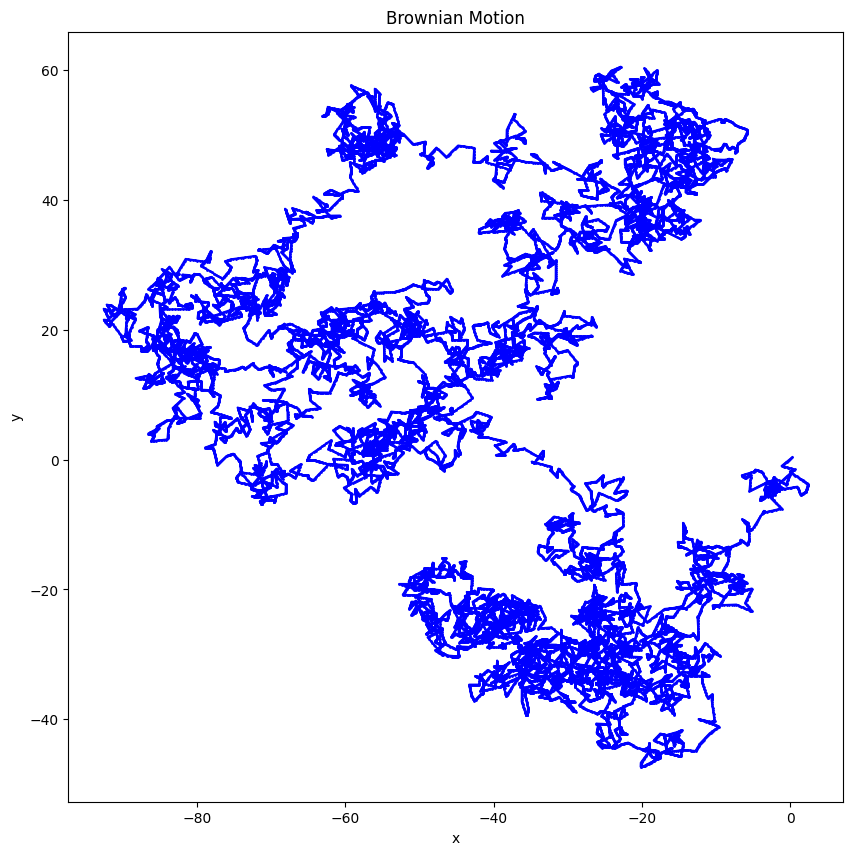

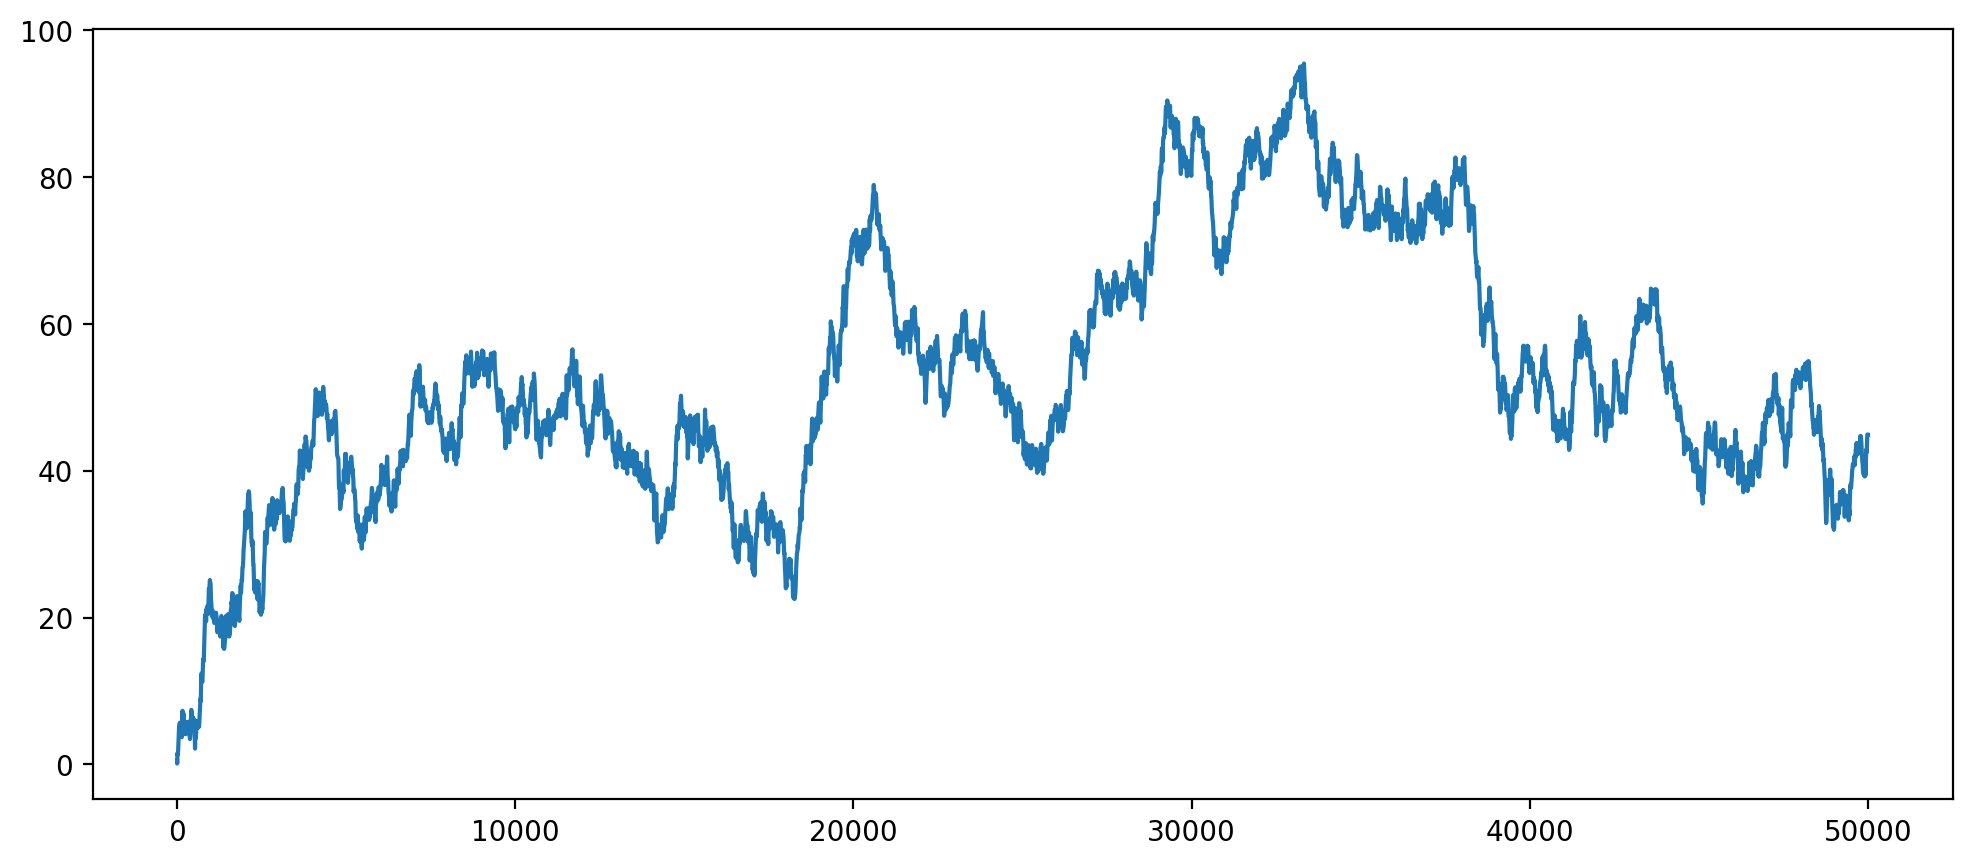

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
steps = 5000
random.seed(42)
x,y = np.cumsum(np.random.randn(steps)), np.cumsum(np.random.randn(steps))
points = 10
ip = lambda x, steps, points: np.interp(np.arange(steps*points), 
                                        np.arange(steps)*points, 
                                        x)
X, Y = ip(x, steps, points), ip(y, steps, points)
S = np.sqrt(np.power(X, 2) + np.power(Y, 2))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Brownian Motion')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(X, Y, color='blue',
        marker='o',  markersize=1)  

plt.figure(figsize=(12, 5), dpi = 200)
plt.plot(np.arange(len(S)), S)

## Задание 13. Исследование аппроксимации и сходимости разностной схемы.

Для предложенных разностных схем вычислить порядок аппроксимации, найти точное решение и исследовать его сходимость к решению дифференциальной задачи Коши $y^{\prime}=\alpha x, y(0)=y_{0}, 0 \leqslant t \leqslant T, \alpha=$ const. У казать дополнительные краевые условия в схемах в) и г) и выяснить их влияние на сходимость и требования к точности их задания.


a) $\frac{y_{n+1}-y_{n}}{\tau}=\alpha y_{n}$,

б) $\frac{y_{n+1}-y_{n}}{\tau}=\alpha \frac{y_{n}+y_{n+1}}{2}$,

в) $\frac{y_{n+1}-y_{n-1}}{2 \tau}=\alpha y_{n}$,

г) $\frac{y_{n+1}-y_{n}}{\tau}=\frac{\alpha}{2}\left(3 y_{n}-y_{n-1}\right)$.

Решение. 

Аппроксимация


a)
$$
\begin{aligned}
\psi^{(h)} &=\left\{\begin{array}{l}
{[y]_{0}-y_{0}} \\
\frac{[y]_{n+1}-[y]_{n}}{\tau}-\alpha[y]_{n}, \quad=\left\{\begin{array} { l } 
{ 0 } \\
{ [ n = 0 , \ldots , N - 1 }
\end{array} \quad \left\{\begin{array}{l}
{[y]_{n}+\tau\left[y^{\prime}\right]_{n}+\frac{\tau^{2}}{2}\left[y^{\prime \prime}\right]_{n}+O\left(\tau^{3}\right)-[y]_{n}} \\
\tau \\
n=0, \ldots, N-1
\end{array}-\alpha[y]_{n}, \quad=\right.\right.
\end{array}\right.\\
&=\left\{\begin{array}{l}
0 \\
{\left[y^{\prime}\right]_{n}-\alpha[y]_{n}+\frac{\tau}{2}\left[y^{\prime \prime}\right]_{n}+O\left(\tau^{2}\right), \quad=\left\{\begin{array}{l}
0 \\
O(\tau), n=0, \ldots, N-1
\end{array}\right.} \\
n=0, \ldots, N-1
\end{array}\right.
\end{aligned}
$$
б)
$$
\psi^{(h)}=\left\{\begin{array}{l}
{[y]_{0}-y_{0}} \\
\frac{[y]_{n+1}-[y]_{n}}{\tau}-\frac{\alpha}{2}\left([y]_{n}+[y]_{n+1}\right), \\
n=0, \ldots, N-1
\end{array}=\right.
$$  